In [112]:
import pandas as pd
# this function generates an item bank, in case the user cannot provide one
from catsim.cat import generate_item_bank
# simulation package contains the Simulator and all abstract classes
from catsim.simulation import *
# initialization package contains different initial proficiency estimation strategies
from catsim.initialization import *
# selection package contains different item selection strategies
from catsim.selection import *
# estimation package contains different proficiency estimation methods
from catsim.estimation import *
# stopping package contains different stopping criteria for the CAT
from catsim.stopping import *
import catsim.plot as catplot
from catsim.irt import icc
from catsim.irt import detect_model


# this function generates an item bank, in case the user cannot provide one
from catsim.cat import generate_item_bank
# simulation package contains the Simulator and all abstract classes
from catsim.simulation import *
# initialization package contains different initial proficiency estimation strategies
from catsim.initialization import *
# selection package contains different item selection strategies
from catsim.selection import *
# estimation package contains different proficiency estimation methods
from catsim.estimation import *
# stopping package contains different stopping criteria for the CAT
from catsim.stopping import *
import catsim.plot as catplot
from catsim.irt import icc

import sys
import torch  
import gym
import numpy as np  
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
import gym
import random

from gym import Env, spaces
import time

from IPython import display
from random import randint
import statistics
import time

In [83]:
def avalia_seletor(selector, base_result, alunos, param, items):

#     mu = -4
#     sigma = 0
#     nq = 0

    aluno_vet = list(range(0, len(alunos.index)))

    responses = []
    administered_items = []
    theta_est = []
    erro_theta = []

    #initializer = RandomInitializer()
    estimator = NumericalSearchEstimator()
    est_theta = initializer.initialize()
    full_items = list(range(0, 45))

#     mu = 0
#     sigma = 0
    nq = 0
    est_theta=0

    result = np.reshape(list(range(0, 45)),(1,45))

    for aluno in aluno_vet: 
        print('aluno:', aluno)
        respostas = alunos.iloc[aluno,0:45].tolist()
        ori_theta = estimator.estimate(items=items, administered_items=full_items, response_vector=respostas, est_theta=est_theta)
        #print('Theta Original: ',ori_theta)
        responses = []
        administered_items = []
        theta_est = []
        erro_theta = []
        for nq in range(0, 45):
            item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)

            correct = alunos.iloc[aluno,item_index]
            administered_items.append(item_index)
            responses.append(correct)

            est_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
            #print('Estimated proficiency, given answered items:', est_theta)
            theta_est.append(est_theta)

            erro = ori_theta - est_theta
            #erro_2 = (ori_theta - est_theta)**2
            #print('erro:', erro_2)
            erro_theta.append(erro)

            nq = nq+1
            #print('nq:', nq)

        erro_theta = np.reshape(erro_theta,(1,45))
        result = np.concatenate((result, erro_theta), axis=0)


    # define a legenda e tamanho de linhas
    plt.plot(range(0, 45), np.sqrt(np.mean((result[1:,:])**2,axis=0)), label='Seletor', linewidth=2)
    #plt.plot(range(0, 45), result[2,], label='Aleatorio', linewidth=2)

    plt.xlabel('numero de questões')
    plt.ylabel('RMSE')
    plt.title("Avaliação dos métodos de seleção")

    np.savetxt(base_result, result)

    # Exibe a legenda e por padrão usa o label de cada plot.
    plt.legend()
    plt.show()
    print(selector)
    print(len(alunos.index))

## Base 1.000

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846

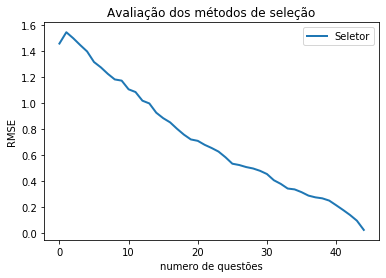

Random Selector
1000
64.11792469024658


In [69]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = RandomSelector()
base_result = 'Result_dif_erro_RandomSelector-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3


C:\Users\patri\Anaconda3\lib\site-packages\catsim\selection.py:73: UserWarning: This selector needs an item matrix with at least 5 columns, with the last one representing item exposure rate. Since this column is absent, it will presume all items have exposure rates = 0
  "This selector needs an item matrix with at least 5 columns, with the last one representing item exposure rate. Since this column is absent, it will presume all items have exposure rates = 0"


aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100
aluno: 101
aluno: 102
aluno: 103
al

aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846
aluno: 847
aluno: 848
aluno: 849

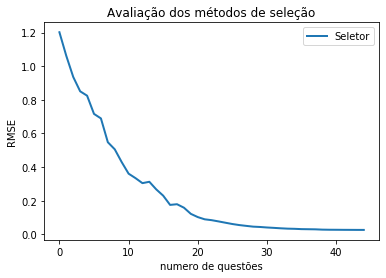

Maximum Information Selector
1000
61.174169301986694


In [70]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = MaxInfoSelector()
base_result = 'Result_dif_erro_MaxInfoSelector-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846

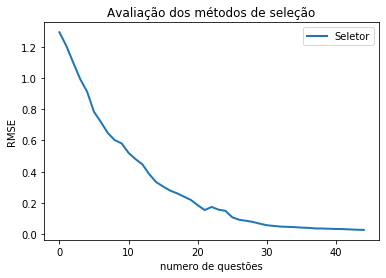

Urry Selector
1000
60.47764611244202


In [71]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = UrrySelector()
base_result = 'Result_dif_erro_UrrySelector-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 755
aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845

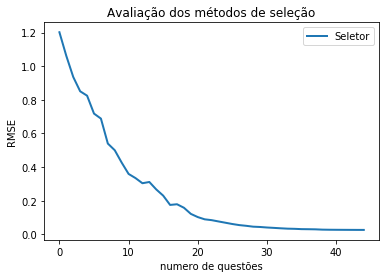

Interval Information Selector
1000
226.56632137298584


In [72]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(0.1)
base_result = 'Result_dif_erro_IntervalInfoSelector01-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 755
aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845

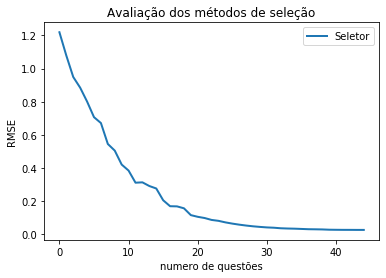

Interval Information Selector
1000
219.01509284973145


In [73]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(0.5)
base_result = 'Result_dif_erro_IntervalInfoSelector05-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 755
aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845

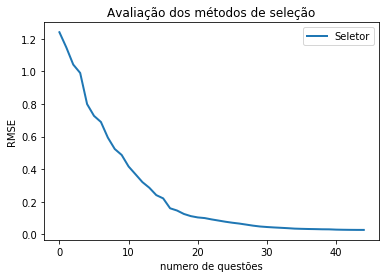

Interval Information Selector
1000
238.33852791786194


In [74]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(1)
base_result = 'Result_dif_erro_IntervalInfoSelector1-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846
aluno: 847

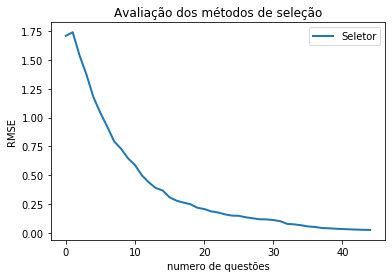

a-Stratified b-Blocking Selector
1000
55.1553156375885


In [76]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file1000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = AStratBBlockSelector(45)
base_result = 'Result_dif_erro_AStratBBlockSelector45-base1000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

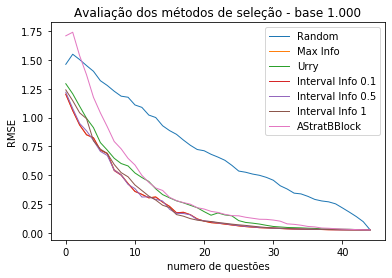

In [87]:
a = np.loadtxt('Result_dif_erro_RandomSelector-base1000.txt')
b = np.loadtxt('Result_dif_erro_MaxInfoSelector-base1000.txt')
c = np.loadtxt('Result_dif_erro_UrrySelector-base1000.txt')
d = np.loadtxt('Result_dif_erro_IntervalInfoSelector01-base1000.txt')
e = np.loadtxt('Result_dif_erro_IntervalInfoSelector05-base1000.txt')
f = np.loadtxt('Result_dif_erro_IntervalInfoSelector1-base1000.txt')
g = np.loadtxt('Result_dif_erro_AStratBBlockSelector45-base1000.txt')

# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((a[1:,:])**2,axis=0)), label='Random', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((b[1:,:])**2,axis=0)), label='Max Info', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((c[1:,:])**2,axis=0)), label='Urry', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((d[1:,:])**2,axis=0)), label='Interval Info 0.1', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((e[1:,:])**2,axis=0)), label='Interval Info 0.5', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((f[1:,:])**2,axis=0)), label='Interval Info 1', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((g[1:,:])**2,axis=0)), label='AStratBBlock', linewidth=1)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção - base 1.000")

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

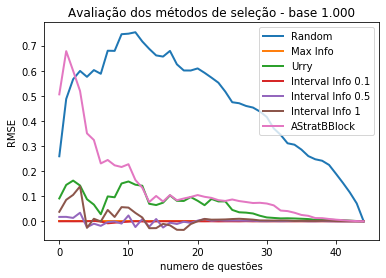

In [93]:
a = np.loadtxt('Result_dif_erro_RandomSelector-base1000.txt')
b = np.loadtxt('Result_dif_erro_MaxInfoSelector-base1000.txt')
base_b = np.sqrt(np.mean((b[1:,:])**2,axis=0))
c = np.loadtxt('Result_dif_erro_UrrySelector-base1000.txt')
d = np.loadtxt('Result_dif_erro_IntervalInfoSelector01-base1000.txt')
e = np.loadtxt('Result_dif_erro_IntervalInfoSelector05-base1000.txt')
f = np.loadtxt('Result_dif_erro_IntervalInfoSelector1-base1000.txt')
g = np.loadtxt('Result_dif_erro_AStratBBlockSelector45-base1000.txt')

# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((a[1:,:])**2,axis=0))-base_b, label='Random', linewidth=2)
plt.plot(range(0, 45), np.sqrt(np.mean((b[1:,:])**2,axis=0))-base_b, label='Max Info', linewidth=2)
plt.plot(range(0, 45), np.sqrt(np.mean((c[1:,:])**2,axis=0))-base_b, label='Urry', linewidth=2)
plt.plot(range(0, 45), np.sqrt(np.mean((d[1:,:])**2,axis=0))-base_b, label='Interval Info 0.1', linewidth=2)
plt.plot(range(0, 45), np.sqrt(np.mean((e[1:,:])**2,axis=0))-base_b, label='Interval Info 0.5', linewidth=2)
plt.plot(range(0, 45), np.sqrt(np.mean((f[1:,:])**2,axis=0))-base_b, label='Interval Info 1', linewidth=2)
plt.plot(range(0, 45), np.sqrt(np.mean((g[1:,:])**2,axis=0))-base_b, label='AStratBBlock', linewidth=2)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção - base 1.000")

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

In [110]:
x = np.random.rand(10)
np.sort(x)

array([0.05735776, 0.08992424, 0.14227793, 0.28723443, 0.29560558,
       0.37768141, 0.46117462, 0.50993714, 0.69417502, 0.70385608])

In [111]:
z = np.argsort(x)
x[z[0:4]]

array([0.05735776, 0.08992424, 0.14227793, 0.28723443])

In [108]:
z[0,0:4]

array([8, 5, 6, 7], dtype=int64)

## Base 10.000

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846

aluno: 1462
aluno: 1463
aluno: 1464
aluno: 1465
aluno: 1466
aluno: 1467
aluno: 1468
aluno: 1469
aluno: 1470
aluno: 1471
aluno: 1472
aluno: 1473
aluno: 1474
aluno: 1475
aluno: 1476
aluno: 1477
aluno: 1478
aluno: 1479
aluno: 1480
aluno: 1481
aluno: 1482
aluno: 1483
aluno: 1484
aluno: 1485
aluno: 1486
aluno: 1487
aluno: 1488
aluno: 1489
aluno: 1490
aluno: 1491
aluno: 1492
aluno: 1493
aluno: 1494
aluno: 1495
aluno: 1496
aluno: 1497
aluno: 1498
aluno: 1499
aluno: 1500
aluno: 1501
aluno: 1502
aluno: 1503
aluno: 1504
aluno: 1505
aluno: 1506
aluno: 1507
aluno: 1508
aluno: 1509
aluno: 1510
aluno: 1511
aluno: 1512
aluno: 1513
aluno: 1514
aluno: 1515
aluno: 1516
aluno: 1517
aluno: 1518
aluno: 1519
aluno: 1520
aluno: 1521
aluno: 1522
aluno: 1523
aluno: 1524
aluno: 1525
aluno: 1526
aluno: 1527
aluno: 1528
aluno: 1529
aluno: 1530
aluno: 1531
aluno: 1532
aluno: 1533
aluno: 1534
aluno: 1535
aluno: 1536
aluno: 1537
aluno: 1538
aluno: 1539
aluno: 1540
aluno: 1541
aluno: 1542
aluno: 1543
aluno: 1544
alun

aluno: 2146
aluno: 2147
aluno: 2148
aluno: 2149
aluno: 2150
aluno: 2151
aluno: 2152
aluno: 2153
aluno: 2154
aluno: 2155
aluno: 2156
aluno: 2157
aluno: 2158
aluno: 2159
aluno: 2160
aluno: 2161
aluno: 2162
aluno: 2163
aluno: 2164
aluno: 2165
aluno: 2166
aluno: 2167
aluno: 2168
aluno: 2169
aluno: 2170
aluno: 2171
aluno: 2172
aluno: 2173
aluno: 2174
aluno: 2175
aluno: 2176
aluno: 2177
aluno: 2178
aluno: 2179
aluno: 2180
aluno: 2181
aluno: 2182
aluno: 2183
aluno: 2184
aluno: 2185
aluno: 2186
aluno: 2187
aluno: 2188
aluno: 2189
aluno: 2190
aluno: 2191
aluno: 2192
aluno: 2193
aluno: 2194
aluno: 2195
aluno: 2196
aluno: 2197
aluno: 2198
aluno: 2199
aluno: 2200
aluno: 2201
aluno: 2202
aluno: 2203
aluno: 2204
aluno: 2205
aluno: 2206
aluno: 2207
aluno: 2208
aluno: 2209
aluno: 2210
aluno: 2211
aluno: 2212
aluno: 2213
aluno: 2214
aluno: 2215
aluno: 2216
aluno: 2217
aluno: 2218
aluno: 2219
aluno: 2220
aluno: 2221
aluno: 2222
aluno: 2223
aluno: 2224
aluno: 2225
aluno: 2226
aluno: 2227
aluno: 2228
alun

aluno: 2830
aluno: 2831
aluno: 2832
aluno: 2833
aluno: 2834
aluno: 2835
aluno: 2836
aluno: 2837
aluno: 2838
aluno: 2839
aluno: 2840
aluno: 2841
aluno: 2842
aluno: 2843
aluno: 2844
aluno: 2845
aluno: 2846
aluno: 2847
aluno: 2848
aluno: 2849
aluno: 2850
aluno: 2851
aluno: 2852
aluno: 2853
aluno: 2854
aluno: 2855
aluno: 2856
aluno: 2857
aluno: 2858
aluno: 2859
aluno: 2860
aluno: 2861
aluno: 2862
aluno: 2863
aluno: 2864
aluno: 2865
aluno: 2866
aluno: 2867
aluno: 2868
aluno: 2869
aluno: 2870
aluno: 2871
aluno: 2872
aluno: 2873
aluno: 2874
aluno: 2875
aluno: 2876
aluno: 2877
aluno: 2878
aluno: 2879
aluno: 2880
aluno: 2881
aluno: 2882
aluno: 2883
aluno: 2884
aluno: 2885
aluno: 2886
aluno: 2887
aluno: 2888
aluno: 2889
aluno: 2890
aluno: 2891
aluno: 2892
aluno: 2893
aluno: 2894
aluno: 2895
aluno: 2896
aluno: 2897
aluno: 2898
aluno: 2899
aluno: 2900
aluno: 2901
aluno: 2902
aluno: 2903
aluno: 2904
aluno: 2905
aluno: 2906
aluno: 2907
aluno: 2908
aluno: 2909
aluno: 2910
aluno: 2911
aluno: 2912
alun

aluno: 3513
aluno: 3514
aluno: 3515
aluno: 3516
aluno: 3517
aluno: 3518
aluno: 3519
aluno: 3520
aluno: 3521
aluno: 3522
aluno: 3523
aluno: 3524
aluno: 3525
aluno: 3526
aluno: 3527
aluno: 3528
aluno: 3529
aluno: 3530
aluno: 3531
aluno: 3532
aluno: 3533
aluno: 3534
aluno: 3535
aluno: 3536
aluno: 3537
aluno: 3538
aluno: 3539
aluno: 3540
aluno: 3541
aluno: 3542
aluno: 3543
aluno: 3544
aluno: 3545
aluno: 3546
aluno: 3547
aluno: 3548
aluno: 3549
aluno: 3550
aluno: 3551
aluno: 3552
aluno: 3553
aluno: 3554
aluno: 3555
aluno: 3556
aluno: 3557
aluno: 3558
aluno: 3559
aluno: 3560
aluno: 3561
aluno: 3562
aluno: 3563
aluno: 3564
aluno: 3565
aluno: 3566
aluno: 3567
aluno: 3568
aluno: 3569
aluno: 3570
aluno: 3571
aluno: 3572
aluno: 3573
aluno: 3574
aluno: 3575
aluno: 3576
aluno: 3577
aluno: 3578
aluno: 3579
aluno: 3580
aluno: 3581
aluno: 3582
aluno: 3583
aluno: 3584
aluno: 3585
aluno: 3586
aluno: 3587
aluno: 3588
aluno: 3589
aluno: 3590
aluno: 3591
aluno: 3592
aluno: 3593
aluno: 3594
aluno: 3595
alun

aluno: 4197
aluno: 4198
aluno: 4199
aluno: 4200
aluno: 4201
aluno: 4202
aluno: 4203
aluno: 4204
aluno: 4205
aluno: 4206
aluno: 4207
aluno: 4208
aluno: 4209
aluno: 4210
aluno: 4211
aluno: 4212
aluno: 4213
aluno: 4214
aluno: 4215
aluno: 4216
aluno: 4217
aluno: 4218
aluno: 4219
aluno: 4220
aluno: 4221
aluno: 4222
aluno: 4223
aluno: 4224
aluno: 4225
aluno: 4226
aluno: 4227
aluno: 4228
aluno: 4229
aluno: 4230
aluno: 4231
aluno: 4232
aluno: 4233
aluno: 4234
aluno: 4235
aluno: 4236
aluno: 4237
aluno: 4238
aluno: 4239
aluno: 4240
aluno: 4241
aluno: 4242
aluno: 4243
aluno: 4244
aluno: 4245
aluno: 4246
aluno: 4247
aluno: 4248
aluno: 4249
aluno: 4250
aluno: 4251
aluno: 4252
aluno: 4253
aluno: 4254
aluno: 4255
aluno: 4256
aluno: 4257
aluno: 4258
aluno: 4259
aluno: 4260
aluno: 4261
aluno: 4262
aluno: 4263
aluno: 4264
aluno: 4265
aluno: 4266
aluno: 4267
aluno: 4268
aluno: 4269
aluno: 4270
aluno: 4271
aluno: 4272
aluno: 4273
aluno: 4274
aluno: 4275
aluno: 4276
aluno: 4277
aluno: 4278
aluno: 4279
alun

aluno: 4882
aluno: 4883
aluno: 4884
aluno: 4885
aluno: 4886
aluno: 4887
aluno: 4888
aluno: 4889
aluno: 4890
aluno: 4891
aluno: 4892
aluno: 4893
aluno: 4894
aluno: 4895
aluno: 4896
aluno: 4897
aluno: 4898
aluno: 4899
aluno: 4900
aluno: 4901
aluno: 4902
aluno: 4903
aluno: 4904
aluno: 4905
aluno: 4906
aluno: 4907
aluno: 4908
aluno: 4909
aluno: 4910
aluno: 4911
aluno: 4912
aluno: 4913
aluno: 4914
aluno: 4915
aluno: 4916
aluno: 4917
aluno: 4918
aluno: 4919
aluno: 4920
aluno: 4921
aluno: 4922
aluno: 4923
aluno: 4924
aluno: 4925
aluno: 4926
aluno: 4927
aluno: 4928
aluno: 4929
aluno: 4930
aluno: 4931
aluno: 4932
aluno: 4933
aluno: 4934
aluno: 4935
aluno: 4936
aluno: 4937
aluno: 4938
aluno: 4939
aluno: 4940
aluno: 4941
aluno: 4942
aluno: 4943
aluno: 4944
aluno: 4945
aluno: 4946
aluno: 4947
aluno: 4948
aluno: 4949
aluno: 4950
aluno: 4951
aluno: 4952
aluno: 4953
aluno: 4954
aluno: 4955
aluno: 4956
aluno: 4957
aluno: 4958
aluno: 4959
aluno: 4960
aluno: 4961
aluno: 4962
aluno: 4963
aluno: 4964
alun

aluno: 5566
aluno: 5567
aluno: 5568
aluno: 5569
aluno: 5570
aluno: 5571
aluno: 5572
aluno: 5573
aluno: 5574
aluno: 5575
aluno: 5576
aluno: 5577
aluno: 5578
aluno: 5579
aluno: 5580
aluno: 5581
aluno: 5582
aluno: 5583
aluno: 5584
aluno: 5585
aluno: 5586
aluno: 5587
aluno: 5588
aluno: 5589
aluno: 5590
aluno: 5591
aluno: 5592
aluno: 5593
aluno: 5594
aluno: 5595
aluno: 5596
aluno: 5597
aluno: 5598
aluno: 5599
aluno: 5600
aluno: 5601
aluno: 5602
aluno: 5603
aluno: 5604
aluno: 5605
aluno: 5606
aluno: 5607
aluno: 5608
aluno: 5609
aluno: 5610
aluno: 5611
aluno: 5612
aluno: 5613
aluno: 5614
aluno: 5615
aluno: 5616
aluno: 5617
aluno: 5618
aluno: 5619
aluno: 5620
aluno: 5621
aluno: 5622
aluno: 5623
aluno: 5624
aluno: 5625
aluno: 5626
aluno: 5627
aluno: 5628
aluno: 5629
aluno: 5630
aluno: 5631
aluno: 5632
aluno: 5633
aluno: 5634
aluno: 5635
aluno: 5636
aluno: 5637
aluno: 5638
aluno: 5639
aluno: 5640
aluno: 5641
aluno: 5642
aluno: 5643
aluno: 5644
aluno: 5645
aluno: 5646
aluno: 5647
aluno: 5648
alun

aluno: 6251
aluno: 6252
aluno: 6253
aluno: 6254
aluno: 6255
aluno: 6256
aluno: 6257
aluno: 6258
aluno: 6259
aluno: 6260
aluno: 6261
aluno: 6262
aluno: 6263
aluno: 6264
aluno: 6265
aluno: 6266
aluno: 6267
aluno: 6268
aluno: 6269
aluno: 6270
aluno: 6271
aluno: 6272
aluno: 6273
aluno: 6274
aluno: 6275
aluno: 6276
aluno: 6277
aluno: 6278
aluno: 6279
aluno: 6280
aluno: 6281
aluno: 6282
aluno: 6283
aluno: 6284
aluno: 6285
aluno: 6286
aluno: 6287
aluno: 6288
aluno: 6289
aluno: 6290
aluno: 6291
aluno: 6292
aluno: 6293
aluno: 6294
aluno: 6295
aluno: 6296
aluno: 6297
aluno: 6298
aluno: 6299
aluno: 6300
aluno: 6301
aluno: 6302
aluno: 6303
aluno: 6304
aluno: 6305
aluno: 6306
aluno: 6307
aluno: 6308
aluno: 6309
aluno: 6310
aluno: 6311
aluno: 6312
aluno: 6313
aluno: 6314
aluno: 6315
aluno: 6316
aluno: 6317
aluno: 6318
aluno: 6319
aluno: 6320
aluno: 6321
aluno: 6322
aluno: 6323
aluno: 6324
aluno: 6325
aluno: 6326
aluno: 6327
aluno: 6328
aluno: 6329
aluno: 6330
aluno: 6331
aluno: 6332
aluno: 6333
alun

aluno: 6934
aluno: 6935
aluno: 6936
aluno: 6937
aluno: 6938
aluno: 6939
aluno: 6940
aluno: 6941
aluno: 6942
aluno: 6943
aluno: 6944
aluno: 6945
aluno: 6946
aluno: 6947
aluno: 6948
aluno: 6949
aluno: 6950
aluno: 6951
aluno: 6952
aluno: 6953
aluno: 6954
aluno: 6955
aluno: 6956
aluno: 6957
aluno: 6958
aluno: 6959
aluno: 6960
aluno: 6961
aluno: 6962
aluno: 6963
aluno: 6964
aluno: 6965
aluno: 6966
aluno: 6967
aluno: 6968
aluno: 6969
aluno: 6970
aluno: 6971
aluno: 6972
aluno: 6973
aluno: 6974
aluno: 6975
aluno: 6976
aluno: 6977
aluno: 6978
aluno: 6979
aluno: 6980
aluno: 6981
aluno: 6982
aluno: 6983
aluno: 6984
aluno: 6985
aluno: 6986
aluno: 6987
aluno: 6988
aluno: 6989
aluno: 6990
aluno: 6991
aluno: 6992
aluno: 6993
aluno: 6994
aluno: 6995
aluno: 6996
aluno: 6997
aluno: 6998
aluno: 6999
aluno: 7000
aluno: 7001
aluno: 7002
aluno: 7003
aluno: 7004
aluno: 7005
aluno: 7006
aluno: 7007
aluno: 7008
aluno: 7009
aluno: 7010
aluno: 7011
aluno: 7012
aluno: 7013
aluno: 7014
aluno: 7015
aluno: 7016
alun

aluno: 7617
aluno: 7618
aluno: 7619
aluno: 7620
aluno: 7621
aluno: 7622
aluno: 7623
aluno: 7624
aluno: 7625
aluno: 7626
aluno: 7627
aluno: 7628
aluno: 7629
aluno: 7630
aluno: 7631
aluno: 7632
aluno: 7633
aluno: 7634
aluno: 7635
aluno: 7636
aluno: 7637
aluno: 7638
aluno: 7639
aluno: 7640
aluno: 7641
aluno: 7642
aluno: 7643
aluno: 7644
aluno: 7645
aluno: 7646
aluno: 7647
aluno: 7648
aluno: 7649
aluno: 7650
aluno: 7651
aluno: 7652
aluno: 7653
aluno: 7654
aluno: 7655
aluno: 7656
aluno: 7657
aluno: 7658
aluno: 7659
aluno: 7660
aluno: 7661
aluno: 7662
aluno: 7663
aluno: 7664
aluno: 7665
aluno: 7666
aluno: 7667
aluno: 7668
aluno: 7669
aluno: 7670
aluno: 7671
aluno: 7672
aluno: 7673
aluno: 7674
aluno: 7675
aluno: 7676
aluno: 7677
aluno: 7678
aluno: 7679
aluno: 7680
aluno: 7681
aluno: 7682
aluno: 7683
aluno: 7684
aluno: 7685
aluno: 7686
aluno: 7687
aluno: 7688
aluno: 7689
aluno: 7690
aluno: 7691
aluno: 7692
aluno: 7693
aluno: 7694
aluno: 7695
aluno: 7696
aluno: 7697
aluno: 7698
aluno: 7699
alun

aluno: 8304
aluno: 8305
aluno: 8306
aluno: 8307
aluno: 8308
aluno: 8309
aluno: 8310
aluno: 8311
aluno: 8312
aluno: 8313
aluno: 8314
aluno: 8315
aluno: 8316
aluno: 8317
aluno: 8318
aluno: 8319
aluno: 8320
aluno: 8321
aluno: 8322
aluno: 8323
aluno: 8324
aluno: 8325
aluno: 8326
aluno: 8327
aluno: 8328
aluno: 8329
aluno: 8330
aluno: 8331
aluno: 8332
aluno: 8333
aluno: 8334
aluno: 8335
aluno: 8336
aluno: 8337
aluno: 8338
aluno: 8339
aluno: 8340
aluno: 8341
aluno: 8342
aluno: 8343
aluno: 8344
aluno: 8345
aluno: 8346
aluno: 8347
aluno: 8348
aluno: 8349
aluno: 8350
aluno: 8351
aluno: 8352
aluno: 8353
aluno: 8354
aluno: 8355
aluno: 8356
aluno: 8357
aluno: 8358
aluno: 8359
aluno: 8360
aluno: 8361
aluno: 8362
aluno: 8363
aluno: 8364
aluno: 8365
aluno: 8366
aluno: 8367
aluno: 8368
aluno: 8369
aluno: 8370
aluno: 8371
aluno: 8372
aluno: 8373
aluno: 8374
aluno: 8375
aluno: 8376
aluno: 8377
aluno: 8378
aluno: 8379
aluno: 8380
aluno: 8381
aluno: 8382
aluno: 8383
aluno: 8384
aluno: 8385
aluno: 8386
alun

aluno: 8988
aluno: 8989
aluno: 8990
aluno: 8991
aluno: 8992
aluno: 8993
aluno: 8994
aluno: 8995
aluno: 8996
aluno: 8997
aluno: 8998
aluno: 8999
aluno: 9000
aluno: 9001
aluno: 9002
aluno: 9003
aluno: 9004
aluno: 9005
aluno: 9006
aluno: 9007
aluno: 9008
aluno: 9009
aluno: 9010
aluno: 9011
aluno: 9012
aluno: 9013
aluno: 9014
aluno: 9015
aluno: 9016
aluno: 9017
aluno: 9018
aluno: 9019
aluno: 9020
aluno: 9021
aluno: 9022
aluno: 9023
aluno: 9024
aluno: 9025
aluno: 9026
aluno: 9027
aluno: 9028
aluno: 9029
aluno: 9030
aluno: 9031
aluno: 9032
aluno: 9033
aluno: 9034
aluno: 9035
aluno: 9036
aluno: 9037
aluno: 9038
aluno: 9039
aluno: 9040
aluno: 9041
aluno: 9042
aluno: 9043
aluno: 9044
aluno: 9045
aluno: 9046
aluno: 9047
aluno: 9048
aluno: 9049
aluno: 9050
aluno: 9051
aluno: 9052
aluno: 9053
aluno: 9054
aluno: 9055
aluno: 9056
aluno: 9057
aluno: 9058
aluno: 9059
aluno: 9060
aluno: 9061
aluno: 9062
aluno: 9063
aluno: 9064
aluno: 9065
aluno: 9066
aluno: 9067
aluno: 9068
aluno: 9069
aluno: 9070
alun

aluno: 9672
aluno: 9673
aluno: 9674
aluno: 9675
aluno: 9676
aluno: 9677
aluno: 9678
aluno: 9679
aluno: 9680
aluno: 9681
aluno: 9682
aluno: 9683
aluno: 9684
aluno: 9685
aluno: 9686
aluno: 9687
aluno: 9688
aluno: 9689
aluno: 9690
aluno: 9691
aluno: 9692
aluno: 9693
aluno: 9694
aluno: 9695
aluno: 9696
aluno: 9697
aluno: 9698
aluno: 9699
aluno: 9700
aluno: 9701
aluno: 9702
aluno: 9703
aluno: 9704
aluno: 9705
aluno: 9706
aluno: 9707
aluno: 9708
aluno: 9709
aluno: 9710
aluno: 9711
aluno: 9712
aluno: 9713
aluno: 9714
aluno: 9715
aluno: 9716
aluno: 9717
aluno: 9718
aluno: 9719
aluno: 9720
aluno: 9721
aluno: 9722
aluno: 9723
aluno: 9724
aluno: 9725
aluno: 9726
aluno: 9727
aluno: 9728
aluno: 9729
aluno: 9730
aluno: 9731
aluno: 9732
aluno: 9733
aluno: 9734
aluno: 9735
aluno: 9736
aluno: 9737
aluno: 9738
aluno: 9739
aluno: 9740
aluno: 9741
aluno: 9742
aluno: 9743
aluno: 9744
aluno: 9745
aluno: 9746
aluno: 9747
aluno: 9748
aluno: 9749
aluno: 9750
aluno: 9751
aluno: 9752
aluno: 9753
aluno: 9754
alun

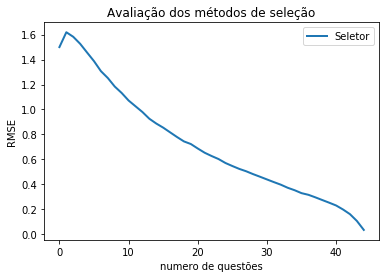

Random Selector
10000
609.4130783081055


In [81]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = RandomSelector()
base_result = 'Result_dif_erro_RandomSelector-base10000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846

aluno: 1460
aluno: 1461
aluno: 1462
aluno: 1463
aluno: 1464
aluno: 1465
aluno: 1466
aluno: 1467
aluno: 1468
aluno: 1469
aluno: 1470
aluno: 1471
aluno: 1472
aluno: 1473
aluno: 1474
aluno: 1475
aluno: 1476
aluno: 1477
aluno: 1478
aluno: 1479
aluno: 1480
aluno: 1481
aluno: 1482
aluno: 1483
aluno: 1484
aluno: 1485
aluno: 1486
aluno: 1487
aluno: 1488
aluno: 1489
aluno: 1490
aluno: 1491
aluno: 1492
aluno: 1493
aluno: 1494
aluno: 1495
aluno: 1496
aluno: 1497
aluno: 1498
aluno: 1499
aluno: 1500
aluno: 1501
aluno: 1502
aluno: 1503
aluno: 1504
aluno: 1505
aluno: 1506
aluno: 1507
aluno: 1508
aluno: 1509
aluno: 1510
aluno: 1511
aluno: 1512
aluno: 1513
aluno: 1514
aluno: 1515
aluno: 1516
aluno: 1517
aluno: 1518
aluno: 1519
aluno: 1520
aluno: 1521
aluno: 1522
aluno: 1523
aluno: 1524
aluno: 1525
aluno: 1526
aluno: 1527
aluno: 1528
aluno: 1529
aluno: 1530
aluno: 1531
aluno: 1532
aluno: 1533
aluno: 1534
aluno: 1535
aluno: 1536
aluno: 1537
aluno: 1538
aluno: 1539
aluno: 1540
aluno: 1541
aluno: 1542
alun

aluno: 2143
aluno: 2144
aluno: 2145
aluno: 2146
aluno: 2147
aluno: 2148
aluno: 2149
aluno: 2150
aluno: 2151
aluno: 2152
aluno: 2153
aluno: 2154
aluno: 2155
aluno: 2156
aluno: 2157
aluno: 2158
aluno: 2159
aluno: 2160
aluno: 2161
aluno: 2162
aluno: 2163
aluno: 2164
aluno: 2165
aluno: 2166
aluno: 2167
aluno: 2168
aluno: 2169
aluno: 2170
aluno: 2171
aluno: 2172
aluno: 2173
aluno: 2174
aluno: 2175
aluno: 2176
aluno: 2177
aluno: 2178
aluno: 2179
aluno: 2180
aluno: 2181
aluno: 2182
aluno: 2183
aluno: 2184
aluno: 2185
aluno: 2186
aluno: 2187
aluno: 2188
aluno: 2189
aluno: 2190
aluno: 2191
aluno: 2192
aluno: 2193
aluno: 2194
aluno: 2195
aluno: 2196
aluno: 2197
aluno: 2198
aluno: 2199
aluno: 2200
aluno: 2201
aluno: 2202
aluno: 2203
aluno: 2204
aluno: 2205
aluno: 2206
aluno: 2207
aluno: 2208
aluno: 2209
aluno: 2210
aluno: 2211
aluno: 2212
aluno: 2213
aluno: 2214
aluno: 2215
aluno: 2216
aluno: 2217
aluno: 2218
aluno: 2219
aluno: 2220
aluno: 2221
aluno: 2222
aluno: 2223
aluno: 2224
aluno: 2225
alun

aluno: 2828
aluno: 2829
aluno: 2830
aluno: 2831
aluno: 2832
aluno: 2833
aluno: 2834
aluno: 2835
aluno: 2836
aluno: 2837
aluno: 2838
aluno: 2839
aluno: 2840
aluno: 2841
aluno: 2842
aluno: 2843
aluno: 2844
aluno: 2845
aluno: 2846
aluno: 2847
aluno: 2848
aluno: 2849
aluno: 2850
aluno: 2851
aluno: 2852
aluno: 2853
aluno: 2854
aluno: 2855
aluno: 2856
aluno: 2857
aluno: 2858
aluno: 2859
aluno: 2860
aluno: 2861
aluno: 2862
aluno: 2863
aluno: 2864
aluno: 2865
aluno: 2866
aluno: 2867
aluno: 2868
aluno: 2869
aluno: 2870
aluno: 2871
aluno: 2872
aluno: 2873
aluno: 2874
aluno: 2875
aluno: 2876
aluno: 2877
aluno: 2878
aluno: 2879
aluno: 2880
aluno: 2881
aluno: 2882
aluno: 2883
aluno: 2884
aluno: 2885
aluno: 2886
aluno: 2887
aluno: 2888
aluno: 2889
aluno: 2890
aluno: 2891
aluno: 2892
aluno: 2893
aluno: 2894
aluno: 2895
aluno: 2896
aluno: 2897
aluno: 2898
aluno: 2899
aluno: 2900
aluno: 2901
aluno: 2902
aluno: 2903
aluno: 2904
aluno: 2905
aluno: 2906
aluno: 2907
aluno: 2908
aluno: 2909
aluno: 2910
alun

aluno: 3511
aluno: 3512
aluno: 3513
aluno: 3514
aluno: 3515
aluno: 3516
aluno: 3517
aluno: 3518
aluno: 3519
aluno: 3520
aluno: 3521
aluno: 3522
aluno: 3523
aluno: 3524
aluno: 3525
aluno: 3526
aluno: 3527
aluno: 3528
aluno: 3529
aluno: 3530
aluno: 3531
aluno: 3532
aluno: 3533
aluno: 3534
aluno: 3535
aluno: 3536
aluno: 3537
aluno: 3538
aluno: 3539
aluno: 3540
aluno: 3541
aluno: 3542
aluno: 3543
aluno: 3544
aluno: 3545
aluno: 3546
aluno: 3547
aluno: 3548
aluno: 3549
aluno: 3550
aluno: 3551
aluno: 3552
aluno: 3553
aluno: 3554
aluno: 3555
aluno: 3556
aluno: 3557
aluno: 3558
aluno: 3559
aluno: 3560
aluno: 3561
aluno: 3562
aluno: 3563
aluno: 3564
aluno: 3565
aluno: 3566
aluno: 3567
aluno: 3568
aluno: 3569
aluno: 3570
aluno: 3571
aluno: 3572
aluno: 3573
aluno: 3574
aluno: 3575
aluno: 3576
aluno: 3577
aluno: 3578
aluno: 3579
aluno: 3580
aluno: 3581
aluno: 3582
aluno: 3583
aluno: 3584
aluno: 3585
aluno: 3586
aluno: 3587
aluno: 3588
aluno: 3589
aluno: 3590
aluno: 3591
aluno: 3592
aluno: 3593
alun

aluno: 4194
aluno: 4195
aluno: 4196
aluno: 4197
aluno: 4198
aluno: 4199
aluno: 4200
aluno: 4201
aluno: 4202
aluno: 4203
aluno: 4204
aluno: 4205
aluno: 4206
aluno: 4207
aluno: 4208
aluno: 4209
aluno: 4210
aluno: 4211
aluno: 4212
aluno: 4213
aluno: 4214
aluno: 4215
aluno: 4216
aluno: 4217
aluno: 4218
aluno: 4219
aluno: 4220
aluno: 4221
aluno: 4222
aluno: 4223
aluno: 4224
aluno: 4225
aluno: 4226
aluno: 4227
aluno: 4228
aluno: 4229
aluno: 4230
aluno: 4231
aluno: 4232
aluno: 4233
aluno: 4234
aluno: 4235
aluno: 4236
aluno: 4237
aluno: 4238
aluno: 4239
aluno: 4240
aluno: 4241
aluno: 4242
aluno: 4243
aluno: 4244
aluno: 4245
aluno: 4246
aluno: 4247
aluno: 4248
aluno: 4249
aluno: 4250
aluno: 4251
aluno: 4252
aluno: 4253
aluno: 4254
aluno: 4255
aluno: 4256
aluno: 4257
aluno: 4258
aluno: 4259
aluno: 4260
aluno: 4261
aluno: 4262
aluno: 4263
aluno: 4264
aluno: 4265
aluno: 4266
aluno: 4267
aluno: 4268
aluno: 4269
aluno: 4270
aluno: 4271
aluno: 4272
aluno: 4273
aluno: 4274
aluno: 4275
aluno: 4276
alun

aluno: 4877
aluno: 4878
aluno: 4879
aluno: 4880
aluno: 4881
aluno: 4882
aluno: 4883
aluno: 4884
aluno: 4885
aluno: 4886
aluno: 4887
aluno: 4888
aluno: 4889
aluno: 4890
aluno: 4891
aluno: 4892
aluno: 4893
aluno: 4894
aluno: 4895
aluno: 4896
aluno: 4897
aluno: 4898
aluno: 4899
aluno: 4900
aluno: 4901
aluno: 4902
aluno: 4903
aluno: 4904
aluno: 4905
aluno: 4906
aluno: 4907
aluno: 4908
aluno: 4909
aluno: 4910
aluno: 4911
aluno: 4912
aluno: 4913
aluno: 4914
aluno: 4915
aluno: 4916
aluno: 4917
aluno: 4918
aluno: 4919
aluno: 4920
aluno: 4921
aluno: 4922
aluno: 4923
aluno: 4924
aluno: 4925
aluno: 4926
aluno: 4927
aluno: 4928
aluno: 4929
aluno: 4930
aluno: 4931
aluno: 4932
aluno: 4933
aluno: 4934
aluno: 4935
aluno: 4936
aluno: 4937
aluno: 4938
aluno: 4939
aluno: 4940
aluno: 4941
aluno: 4942
aluno: 4943
aluno: 4944
aluno: 4945
aluno: 4946
aluno: 4947
aluno: 4948
aluno: 4949
aluno: 4950
aluno: 4951
aluno: 4952
aluno: 4953
aluno: 4954
aluno: 4955
aluno: 4956
aluno: 4957
aluno: 4958
aluno: 4959
alun

aluno: 5560
aluno: 5561
aluno: 5562
aluno: 5563
aluno: 5564
aluno: 5565
aluno: 5566
aluno: 5567
aluno: 5568
aluno: 5569
aluno: 5570
aluno: 5571
aluno: 5572
aluno: 5573
aluno: 5574
aluno: 5575
aluno: 5576
aluno: 5577
aluno: 5578
aluno: 5579
aluno: 5580
aluno: 5581
aluno: 5582
aluno: 5583
aluno: 5584
aluno: 5585
aluno: 5586
aluno: 5587
aluno: 5588
aluno: 5589
aluno: 5590
aluno: 5591
aluno: 5592
aluno: 5593
aluno: 5594
aluno: 5595
aluno: 5596
aluno: 5597
aluno: 5598
aluno: 5599
aluno: 5600
aluno: 5601
aluno: 5602
aluno: 5603
aluno: 5604
aluno: 5605
aluno: 5606
aluno: 5607
aluno: 5608
aluno: 5609
aluno: 5610
aluno: 5611
aluno: 5612
aluno: 5613
aluno: 5614
aluno: 5615
aluno: 5616
aluno: 5617
aluno: 5618
aluno: 5619
aluno: 5620
aluno: 5621
aluno: 5622
aluno: 5623
aluno: 5624
aluno: 5625
aluno: 5626
aluno: 5627
aluno: 5628
aluno: 5629
aluno: 5630
aluno: 5631
aluno: 5632
aluno: 5633
aluno: 5634
aluno: 5635
aluno: 5636
aluno: 5637
aluno: 5638
aluno: 5639
aluno: 5640
aluno: 5641
aluno: 5642
alun

aluno: 6245
aluno: 6246
aluno: 6247
aluno: 6248
aluno: 6249
aluno: 6250
aluno: 6251
aluno: 6252
aluno: 6253
aluno: 6254
aluno: 6255
aluno: 6256
aluno: 6257
aluno: 6258
aluno: 6259
aluno: 6260
aluno: 6261
aluno: 6262
aluno: 6263
aluno: 6264
aluno: 6265
aluno: 6266
aluno: 6267
aluno: 6268
aluno: 6269
aluno: 6270
aluno: 6271
aluno: 6272
aluno: 6273
aluno: 6274
aluno: 6275
aluno: 6276
aluno: 6277
aluno: 6278
aluno: 6279
aluno: 6280
aluno: 6281
aluno: 6282
aluno: 6283
aluno: 6284
aluno: 6285
aluno: 6286
aluno: 6287
aluno: 6288
aluno: 6289
aluno: 6290
aluno: 6291
aluno: 6292
aluno: 6293
aluno: 6294
aluno: 6295
aluno: 6296
aluno: 6297
aluno: 6298
aluno: 6299
aluno: 6300
aluno: 6301
aluno: 6302
aluno: 6303
aluno: 6304
aluno: 6305
aluno: 6306
aluno: 6307
aluno: 6308
aluno: 6309
aluno: 6310
aluno: 6311
aluno: 6312
aluno: 6313
aluno: 6314
aluno: 6315
aluno: 6316
aluno: 6317
aluno: 6318
aluno: 6319
aluno: 6320
aluno: 6321
aluno: 6322
aluno: 6323
aluno: 6324
aluno: 6325
aluno: 6326
aluno: 6327
alun

aluno: 6931
aluno: 6932
aluno: 6933
aluno: 6934
aluno: 6935
aluno: 6936
aluno: 6937
aluno: 6938
aluno: 6939
aluno: 6940
aluno: 6941
aluno: 6942
aluno: 6943
aluno: 6944
aluno: 6945
aluno: 6946
aluno: 6947
aluno: 6948
aluno: 6949
aluno: 6950
aluno: 6951
aluno: 6952
aluno: 6953
aluno: 6954
aluno: 6955
aluno: 6956
aluno: 6957
aluno: 6958
aluno: 6959
aluno: 6960
aluno: 6961
aluno: 6962
aluno: 6963
aluno: 6964
aluno: 6965
aluno: 6966
aluno: 6967
aluno: 6968
aluno: 6969
aluno: 6970
aluno: 6971
aluno: 6972
aluno: 6973
aluno: 6974
aluno: 6975
aluno: 6976
aluno: 6977
aluno: 6978
aluno: 6979
aluno: 6980
aluno: 6981
aluno: 6982
aluno: 6983
aluno: 6984
aluno: 6985
aluno: 6986
aluno: 6987
aluno: 6988
aluno: 6989
aluno: 6990
aluno: 6991
aluno: 6992
aluno: 6993
aluno: 6994
aluno: 6995
aluno: 6996
aluno: 6997
aluno: 6998
aluno: 6999
aluno: 7000
aluno: 7001
aluno: 7002
aluno: 7003
aluno: 7004
aluno: 7005
aluno: 7006
aluno: 7007
aluno: 7008
aluno: 7009
aluno: 7010
aluno: 7011
aluno: 7012
aluno: 7013
alun

aluno: 7617
aluno: 7618
aluno: 7619
aluno: 7620
aluno: 7621
aluno: 7622
aluno: 7623
aluno: 7624
aluno: 7625
aluno: 7626
aluno: 7627
aluno: 7628
aluno: 7629
aluno: 7630
aluno: 7631
aluno: 7632
aluno: 7633
aluno: 7634
aluno: 7635
aluno: 7636
aluno: 7637
aluno: 7638
aluno: 7639
aluno: 7640
aluno: 7641
aluno: 7642
aluno: 7643
aluno: 7644
aluno: 7645
aluno: 7646
aluno: 7647
aluno: 7648
aluno: 7649
aluno: 7650
aluno: 7651
aluno: 7652
aluno: 7653
aluno: 7654
aluno: 7655
aluno: 7656
aluno: 7657
aluno: 7658
aluno: 7659
aluno: 7660
aluno: 7661
aluno: 7662
aluno: 7663
aluno: 7664
aluno: 7665
aluno: 7666
aluno: 7667
aluno: 7668
aluno: 7669
aluno: 7670
aluno: 7671
aluno: 7672
aluno: 7673
aluno: 7674
aluno: 7675
aluno: 7676
aluno: 7677
aluno: 7678
aluno: 7679
aluno: 7680
aluno: 7681
aluno: 7682
aluno: 7683
aluno: 7684
aluno: 7685
aluno: 7686
aluno: 7687
aluno: 7688
aluno: 7689
aluno: 7690
aluno: 7691
aluno: 7692
aluno: 7693
aluno: 7694
aluno: 7695
aluno: 7696
aluno: 7697
aluno: 7698
aluno: 7699
alun

aluno: 8302
aluno: 8303
aluno: 8304
aluno: 8305
aluno: 8306
aluno: 8307
aluno: 8308
aluno: 8309
aluno: 8310
aluno: 8311
aluno: 8312
aluno: 8313
aluno: 8314
aluno: 8315
aluno: 8316
aluno: 8317
aluno: 8318
aluno: 8319
aluno: 8320
aluno: 8321
aluno: 8322
aluno: 8323
aluno: 8324
aluno: 8325
aluno: 8326
aluno: 8327
aluno: 8328
aluno: 8329
aluno: 8330
aluno: 8331
aluno: 8332
aluno: 8333
aluno: 8334
aluno: 8335
aluno: 8336
aluno: 8337
aluno: 8338
aluno: 8339
aluno: 8340
aluno: 8341
aluno: 8342
aluno: 8343
aluno: 8344
aluno: 8345
aluno: 8346
aluno: 8347
aluno: 8348
aluno: 8349
aluno: 8350
aluno: 8351
aluno: 8352
aluno: 8353
aluno: 8354
aluno: 8355
aluno: 8356
aluno: 8357
aluno: 8358
aluno: 8359
aluno: 8360
aluno: 8361
aluno: 8362
aluno: 8363
aluno: 8364
aluno: 8365
aluno: 8366
aluno: 8367
aluno: 8368
aluno: 8369
aluno: 8370
aluno: 8371
aluno: 8372
aluno: 8373
aluno: 8374
aluno: 8375
aluno: 8376
aluno: 8377
aluno: 8378
aluno: 8379
aluno: 8380
aluno: 8381
aluno: 8382
aluno: 8383
aluno: 8384
alun

aluno: 8985
aluno: 8986
aluno: 8987
aluno: 8988
aluno: 8989
aluno: 8990
aluno: 8991
aluno: 8992
aluno: 8993
aluno: 8994
aluno: 8995
aluno: 8996
aluno: 8997
aluno: 8998
aluno: 8999
aluno: 9000
aluno: 9001
aluno: 9002
aluno: 9003
aluno: 9004
aluno: 9005
aluno: 9006
aluno: 9007
aluno: 9008
aluno: 9009
aluno: 9010
aluno: 9011
aluno: 9012
aluno: 9013
aluno: 9014
aluno: 9015
aluno: 9016
aluno: 9017
aluno: 9018
aluno: 9019
aluno: 9020
aluno: 9021
aluno: 9022
aluno: 9023
aluno: 9024
aluno: 9025
aluno: 9026
aluno: 9027
aluno: 9028
aluno: 9029
aluno: 9030
aluno: 9031
aluno: 9032
aluno: 9033
aluno: 9034
aluno: 9035
aluno: 9036
aluno: 9037
aluno: 9038
aluno: 9039
aluno: 9040
aluno: 9041
aluno: 9042
aluno: 9043
aluno: 9044
aluno: 9045
aluno: 9046
aluno: 9047
aluno: 9048
aluno: 9049
aluno: 9050
aluno: 9051
aluno: 9052
aluno: 9053
aluno: 9054
aluno: 9055
aluno: 9056
aluno: 9057
aluno: 9058
aluno: 9059
aluno: 9060
aluno: 9061
aluno: 9062
aluno: 9063
aluno: 9064
aluno: 9065
aluno: 9066
aluno: 9067
alun

aluno: 9669
aluno: 9670
aluno: 9671
aluno: 9672
aluno: 9673
aluno: 9674
aluno: 9675
aluno: 9676
aluno: 9677
aluno: 9678
aluno: 9679
aluno: 9680
aluno: 9681
aluno: 9682
aluno: 9683
aluno: 9684
aluno: 9685
aluno: 9686
aluno: 9687
aluno: 9688
aluno: 9689
aluno: 9690
aluno: 9691
aluno: 9692
aluno: 9693
aluno: 9694
aluno: 9695
aluno: 9696
aluno: 9697
aluno: 9698
aluno: 9699
aluno: 9700
aluno: 9701
aluno: 9702
aluno: 9703
aluno: 9704
aluno: 9705
aluno: 9706
aluno: 9707
aluno: 9708
aluno: 9709
aluno: 9710
aluno: 9711
aluno: 9712
aluno: 9713
aluno: 9714
aluno: 9715
aluno: 9716
aluno: 9717
aluno: 9718
aluno: 9719
aluno: 9720
aluno: 9721
aluno: 9722
aluno: 9723
aluno: 9724
aluno: 9725
aluno: 9726
aluno: 9727
aluno: 9728
aluno: 9729
aluno: 9730
aluno: 9731
aluno: 9732
aluno: 9733
aluno: 9734
aluno: 9735
aluno: 9736
aluno: 9737
aluno: 9738
aluno: 9739
aluno: 9740
aluno: 9741
aluno: 9742
aluno: 9743
aluno: 9744
aluno: 9745
aluno: 9746
aluno: 9747
aluno: 9748
aluno: 9749
aluno: 9750
aluno: 9751
alun

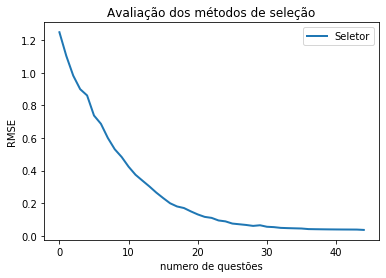

Maximum Information Selector
10000
557.7901632785797


In [88]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = MaxInfoSelector()
base_result = 'Result_dif_erro_MaxInfoSelector-base10000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845
aluno: 846
aluno: 847
aluno: 848

aluno: 1461
aluno: 1462
aluno: 1463
aluno: 1464
aluno: 1465
aluno: 1466
aluno: 1467
aluno: 1468
aluno: 1469
aluno: 1470
aluno: 1471
aluno: 1472
aluno: 1473
aluno: 1474
aluno: 1475
aluno: 1476
aluno: 1477
aluno: 1478
aluno: 1479
aluno: 1480
aluno: 1481
aluno: 1482
aluno: 1483
aluno: 1484
aluno: 1485
aluno: 1486
aluno: 1487
aluno: 1488
aluno: 1489
aluno: 1490
aluno: 1491
aluno: 1492
aluno: 1493
aluno: 1494
aluno: 1495
aluno: 1496
aluno: 1497
aluno: 1498
aluno: 1499
aluno: 1500
aluno: 1501
aluno: 1502
aluno: 1503
aluno: 1504
aluno: 1505
aluno: 1506
aluno: 1507
aluno: 1508
aluno: 1509
aluno: 1510
aluno: 1511
aluno: 1512
aluno: 1513
aluno: 1514
aluno: 1515
aluno: 1516
aluno: 1517
aluno: 1518
aluno: 1519
aluno: 1520
aluno: 1521
aluno: 1522
aluno: 1523
aluno: 1524
aluno: 1525
aluno: 1526
aluno: 1527
aluno: 1528
aluno: 1529
aluno: 1530
aluno: 1531
aluno: 1532
aluno: 1533
aluno: 1534
aluno: 1535
aluno: 1536
aluno: 1537
aluno: 1538
aluno: 1539
aluno: 1540
aluno: 1541
aluno: 1542
aluno: 1543
alun

aluno: 2144
aluno: 2145
aluno: 2146
aluno: 2147
aluno: 2148
aluno: 2149
aluno: 2150
aluno: 2151
aluno: 2152
aluno: 2153
aluno: 2154
aluno: 2155
aluno: 2156
aluno: 2157
aluno: 2158
aluno: 2159
aluno: 2160
aluno: 2161
aluno: 2162
aluno: 2163
aluno: 2164
aluno: 2165
aluno: 2166
aluno: 2167
aluno: 2168
aluno: 2169
aluno: 2170
aluno: 2171
aluno: 2172
aluno: 2173
aluno: 2174
aluno: 2175
aluno: 2176
aluno: 2177
aluno: 2178
aluno: 2179
aluno: 2180
aluno: 2181
aluno: 2182
aluno: 2183
aluno: 2184
aluno: 2185
aluno: 2186
aluno: 2187
aluno: 2188
aluno: 2189
aluno: 2190
aluno: 2191
aluno: 2192
aluno: 2193
aluno: 2194
aluno: 2195
aluno: 2196
aluno: 2197
aluno: 2198
aluno: 2199
aluno: 2200
aluno: 2201
aluno: 2202
aluno: 2203
aluno: 2204
aluno: 2205
aluno: 2206
aluno: 2207
aluno: 2208
aluno: 2209
aluno: 2210
aluno: 2211
aluno: 2212
aluno: 2213
aluno: 2214
aluno: 2215
aluno: 2216
aluno: 2217
aluno: 2218
aluno: 2219
aluno: 2220
aluno: 2221
aluno: 2222
aluno: 2223
aluno: 2224
aluno: 2225
aluno: 2226
alun

aluno: 2828
aluno: 2829
aluno: 2830
aluno: 2831
aluno: 2832
aluno: 2833
aluno: 2834
aluno: 2835
aluno: 2836
aluno: 2837
aluno: 2838
aluno: 2839
aluno: 2840
aluno: 2841
aluno: 2842
aluno: 2843
aluno: 2844
aluno: 2845
aluno: 2846
aluno: 2847
aluno: 2848
aluno: 2849
aluno: 2850
aluno: 2851
aluno: 2852
aluno: 2853
aluno: 2854
aluno: 2855
aluno: 2856
aluno: 2857
aluno: 2858
aluno: 2859
aluno: 2860
aluno: 2861
aluno: 2862
aluno: 2863
aluno: 2864
aluno: 2865
aluno: 2866
aluno: 2867
aluno: 2868
aluno: 2869
aluno: 2870
aluno: 2871
aluno: 2872
aluno: 2873
aluno: 2874
aluno: 2875
aluno: 2876
aluno: 2877
aluno: 2878
aluno: 2879
aluno: 2880
aluno: 2881
aluno: 2882
aluno: 2883
aluno: 2884
aluno: 2885
aluno: 2886
aluno: 2887
aluno: 2888
aluno: 2889
aluno: 2890
aluno: 2891
aluno: 2892
aluno: 2893
aluno: 2894
aluno: 2895
aluno: 2896
aluno: 2897
aluno: 2898
aluno: 2899
aluno: 2900
aluno: 2901
aluno: 2902
aluno: 2903
aluno: 2904
aluno: 2905
aluno: 2906
aluno: 2907
aluno: 2908
aluno: 2909
aluno: 2910
alun

aluno: 3512
aluno: 3513
aluno: 3514
aluno: 3515
aluno: 3516
aluno: 3517
aluno: 3518
aluno: 3519
aluno: 3520
aluno: 3521
aluno: 3522
aluno: 3523
aluno: 3524
aluno: 3525
aluno: 3526
aluno: 3527
aluno: 3528
aluno: 3529
aluno: 3530
aluno: 3531
aluno: 3532
aluno: 3533
aluno: 3534
aluno: 3535
aluno: 3536
aluno: 3537
aluno: 3538
aluno: 3539
aluno: 3540
aluno: 3541
aluno: 3542
aluno: 3543
aluno: 3544
aluno: 3545
aluno: 3546
aluno: 3547
aluno: 3548
aluno: 3549
aluno: 3550
aluno: 3551
aluno: 3552
aluno: 3553
aluno: 3554
aluno: 3555
aluno: 3556
aluno: 3557
aluno: 3558
aluno: 3559
aluno: 3560
aluno: 3561
aluno: 3562
aluno: 3563
aluno: 3564
aluno: 3565
aluno: 3566
aluno: 3567
aluno: 3568
aluno: 3569
aluno: 3570
aluno: 3571
aluno: 3572
aluno: 3573
aluno: 3574
aluno: 3575
aluno: 3576
aluno: 3577
aluno: 3578
aluno: 3579
aluno: 3580
aluno: 3581
aluno: 3582
aluno: 3583
aluno: 3584
aluno: 3585
aluno: 3586
aluno: 3587
aluno: 3588
aluno: 3589
aluno: 3590
aluno: 3591
aluno: 3592
aluno: 3593
aluno: 3594
alun

aluno: 4197
aluno: 4198
aluno: 4199
aluno: 4200
aluno: 4201
aluno: 4202
aluno: 4203
aluno: 4204
aluno: 4205
aluno: 4206
aluno: 4207
aluno: 4208
aluno: 4209
aluno: 4210
aluno: 4211
aluno: 4212
aluno: 4213
aluno: 4214
aluno: 4215
aluno: 4216
aluno: 4217
aluno: 4218
aluno: 4219
aluno: 4220
aluno: 4221
aluno: 4222
aluno: 4223
aluno: 4224
aluno: 4225
aluno: 4226
aluno: 4227
aluno: 4228
aluno: 4229
aluno: 4230
aluno: 4231
aluno: 4232
aluno: 4233
aluno: 4234
aluno: 4235
aluno: 4236
aluno: 4237
aluno: 4238
aluno: 4239
aluno: 4240
aluno: 4241
aluno: 4242
aluno: 4243
aluno: 4244
aluno: 4245
aluno: 4246
aluno: 4247
aluno: 4248
aluno: 4249
aluno: 4250
aluno: 4251
aluno: 4252
aluno: 4253
aluno: 4254
aluno: 4255
aluno: 4256
aluno: 4257
aluno: 4258
aluno: 4259
aluno: 4260
aluno: 4261
aluno: 4262
aluno: 4263
aluno: 4264
aluno: 4265
aluno: 4266
aluno: 4267
aluno: 4268
aluno: 4269
aluno: 4270
aluno: 4271
aluno: 4272
aluno: 4273
aluno: 4274
aluno: 4275
aluno: 4276
aluno: 4277
aluno: 4278
aluno: 4279
alun

aluno: 4881
aluno: 4882
aluno: 4883
aluno: 4884
aluno: 4885
aluno: 4886
aluno: 4887
aluno: 4888
aluno: 4889
aluno: 4890
aluno: 4891
aluno: 4892
aluno: 4893
aluno: 4894
aluno: 4895
aluno: 4896
aluno: 4897
aluno: 4898
aluno: 4899
aluno: 4900
aluno: 4901
aluno: 4902
aluno: 4903
aluno: 4904
aluno: 4905
aluno: 4906
aluno: 4907
aluno: 4908
aluno: 4909
aluno: 4910
aluno: 4911
aluno: 4912
aluno: 4913
aluno: 4914
aluno: 4915
aluno: 4916
aluno: 4917
aluno: 4918
aluno: 4919
aluno: 4920
aluno: 4921
aluno: 4922
aluno: 4923
aluno: 4924
aluno: 4925
aluno: 4926
aluno: 4927
aluno: 4928
aluno: 4929
aluno: 4930
aluno: 4931
aluno: 4932
aluno: 4933
aluno: 4934
aluno: 4935
aluno: 4936
aluno: 4937
aluno: 4938
aluno: 4939
aluno: 4940
aluno: 4941
aluno: 4942
aluno: 4943
aluno: 4944
aluno: 4945
aluno: 4946
aluno: 4947
aluno: 4948
aluno: 4949
aluno: 4950
aluno: 4951
aluno: 4952
aluno: 4953
aluno: 4954
aluno: 4955
aluno: 4956
aluno: 4957
aluno: 4958
aluno: 4959
aluno: 4960
aluno: 4961
aluno: 4962
aluno: 4963
alun

aluno: 5568
aluno: 5569
aluno: 5570
aluno: 5571
aluno: 5572
aluno: 5573
aluno: 5574
aluno: 5575
aluno: 5576
aluno: 5577
aluno: 5578
aluno: 5579
aluno: 5580
aluno: 5581
aluno: 5582
aluno: 5583
aluno: 5584
aluno: 5585
aluno: 5586
aluno: 5587
aluno: 5588
aluno: 5589
aluno: 5590
aluno: 5591
aluno: 5592
aluno: 5593
aluno: 5594
aluno: 5595
aluno: 5596
aluno: 5597
aluno: 5598
aluno: 5599
aluno: 5600
aluno: 5601
aluno: 5602
aluno: 5603
aluno: 5604
aluno: 5605
aluno: 5606
aluno: 5607
aluno: 5608
aluno: 5609
aluno: 5610
aluno: 5611
aluno: 5612
aluno: 5613
aluno: 5614
aluno: 5615
aluno: 5616
aluno: 5617
aluno: 5618
aluno: 5619
aluno: 5620
aluno: 5621
aluno: 5622
aluno: 5623
aluno: 5624
aluno: 5625
aluno: 5626
aluno: 5627
aluno: 5628
aluno: 5629
aluno: 5630
aluno: 5631
aluno: 5632
aluno: 5633
aluno: 5634
aluno: 5635
aluno: 5636
aluno: 5637
aluno: 5638
aluno: 5639
aluno: 5640
aluno: 5641
aluno: 5642
aluno: 5643
aluno: 5644
aluno: 5645
aluno: 5646
aluno: 5647
aluno: 5648
aluno: 5649
aluno: 5650
alun

aluno: 6254
aluno: 6255
aluno: 6256
aluno: 6257
aluno: 6258
aluno: 6259
aluno: 6260
aluno: 6261
aluno: 6262
aluno: 6263
aluno: 6264
aluno: 6265
aluno: 6266
aluno: 6267
aluno: 6268
aluno: 6269
aluno: 6270
aluno: 6271
aluno: 6272
aluno: 6273
aluno: 6274
aluno: 6275
aluno: 6276
aluno: 6277
aluno: 6278
aluno: 6279
aluno: 6280
aluno: 6281
aluno: 6282
aluno: 6283
aluno: 6284
aluno: 6285
aluno: 6286
aluno: 6287
aluno: 6288
aluno: 6289
aluno: 6290
aluno: 6291
aluno: 6292
aluno: 6293
aluno: 6294
aluno: 6295
aluno: 6296
aluno: 6297
aluno: 6298
aluno: 6299
aluno: 6300
aluno: 6301
aluno: 6302
aluno: 6303
aluno: 6304
aluno: 6305
aluno: 6306
aluno: 6307
aluno: 6308
aluno: 6309
aluno: 6310
aluno: 6311
aluno: 6312
aluno: 6313
aluno: 6314
aluno: 6315
aluno: 6316
aluno: 6317
aluno: 6318
aluno: 6319
aluno: 6320
aluno: 6321
aluno: 6322
aluno: 6323
aluno: 6324
aluno: 6325
aluno: 6326
aluno: 6327
aluno: 6328
aluno: 6329
aluno: 6330
aluno: 6331
aluno: 6332
aluno: 6333
aluno: 6334
aluno: 6335
aluno: 6336
alun

aluno: 6941
aluno: 6942
aluno: 6943
aluno: 6944
aluno: 6945
aluno: 6946
aluno: 6947
aluno: 6948
aluno: 6949
aluno: 6950
aluno: 6951
aluno: 6952
aluno: 6953
aluno: 6954
aluno: 6955
aluno: 6956
aluno: 6957
aluno: 6958
aluno: 6959
aluno: 6960
aluno: 6961
aluno: 6962
aluno: 6963
aluno: 6964
aluno: 6965
aluno: 6966
aluno: 6967
aluno: 6968
aluno: 6969
aluno: 6970
aluno: 6971
aluno: 6972
aluno: 6973
aluno: 6974
aluno: 6975
aluno: 6976
aluno: 6977
aluno: 6978
aluno: 6979
aluno: 6980
aluno: 6981
aluno: 6982
aluno: 6983
aluno: 6984
aluno: 6985
aluno: 6986
aluno: 6987
aluno: 6988
aluno: 6989
aluno: 6990
aluno: 6991
aluno: 6992
aluno: 6993
aluno: 6994
aluno: 6995
aluno: 6996
aluno: 6997
aluno: 6998
aluno: 6999
aluno: 7000
aluno: 7001
aluno: 7002
aluno: 7003
aluno: 7004
aluno: 7005
aluno: 7006
aluno: 7007
aluno: 7008
aluno: 7009
aluno: 7010
aluno: 7011
aluno: 7012
aluno: 7013
aluno: 7014
aluno: 7015
aluno: 7016
aluno: 7017
aluno: 7018
aluno: 7019
aluno: 7020
aluno: 7021
aluno: 7022
aluno: 7023
alun

aluno: 7626
aluno: 7627
aluno: 7628
aluno: 7629
aluno: 7630
aluno: 7631
aluno: 7632
aluno: 7633
aluno: 7634
aluno: 7635
aluno: 7636
aluno: 7637
aluno: 7638
aluno: 7639
aluno: 7640
aluno: 7641
aluno: 7642
aluno: 7643
aluno: 7644
aluno: 7645
aluno: 7646
aluno: 7647
aluno: 7648
aluno: 7649
aluno: 7650
aluno: 7651
aluno: 7652
aluno: 7653
aluno: 7654
aluno: 7655
aluno: 7656
aluno: 7657
aluno: 7658
aluno: 7659
aluno: 7660
aluno: 7661
aluno: 7662
aluno: 7663
aluno: 7664
aluno: 7665
aluno: 7666
aluno: 7667
aluno: 7668
aluno: 7669
aluno: 7670
aluno: 7671
aluno: 7672
aluno: 7673
aluno: 7674
aluno: 7675
aluno: 7676
aluno: 7677
aluno: 7678
aluno: 7679
aluno: 7680
aluno: 7681
aluno: 7682
aluno: 7683
aluno: 7684
aluno: 7685
aluno: 7686
aluno: 7687
aluno: 7688
aluno: 7689
aluno: 7690
aluno: 7691
aluno: 7692
aluno: 7693
aluno: 7694
aluno: 7695
aluno: 7696
aluno: 7697
aluno: 7698
aluno: 7699
aluno: 7700
aluno: 7701
aluno: 7702
aluno: 7703
aluno: 7704
aluno: 7705
aluno: 7706
aluno: 7707
aluno: 7708
alun

aluno: 8313
aluno: 8314
aluno: 8315
aluno: 8316
aluno: 8317
aluno: 8318
aluno: 8319
aluno: 8320
aluno: 8321
aluno: 8322
aluno: 8323
aluno: 8324
aluno: 8325
aluno: 8326
aluno: 8327
aluno: 8328
aluno: 8329
aluno: 8330
aluno: 8331
aluno: 8332
aluno: 8333
aluno: 8334
aluno: 8335
aluno: 8336
aluno: 8337
aluno: 8338
aluno: 8339
aluno: 8340
aluno: 8341
aluno: 8342
aluno: 8343
aluno: 8344
aluno: 8345
aluno: 8346
aluno: 8347
aluno: 8348
aluno: 8349
aluno: 8350
aluno: 8351
aluno: 8352
aluno: 8353
aluno: 8354
aluno: 8355
aluno: 8356
aluno: 8357
aluno: 8358
aluno: 8359
aluno: 8360
aluno: 8361
aluno: 8362
aluno: 8363
aluno: 8364
aluno: 8365
aluno: 8366
aluno: 8367
aluno: 8368
aluno: 8369
aluno: 8370
aluno: 8371
aluno: 8372
aluno: 8373
aluno: 8374
aluno: 8375
aluno: 8376
aluno: 8377
aluno: 8378
aluno: 8379
aluno: 8380
aluno: 8381
aluno: 8382
aluno: 8383
aluno: 8384
aluno: 8385
aluno: 8386
aluno: 8387
aluno: 8388
aluno: 8389
aluno: 8390
aluno: 8391
aluno: 8392
aluno: 8393
aluno: 8394
aluno: 8395
alun

aluno: 8996
aluno: 8997
aluno: 8998
aluno: 8999
aluno: 9000
aluno: 9001
aluno: 9002
aluno: 9003
aluno: 9004
aluno: 9005
aluno: 9006
aluno: 9007
aluno: 9008
aluno: 9009
aluno: 9010
aluno: 9011
aluno: 9012
aluno: 9013
aluno: 9014
aluno: 9015
aluno: 9016
aluno: 9017
aluno: 9018
aluno: 9019
aluno: 9020
aluno: 9021
aluno: 9022
aluno: 9023
aluno: 9024
aluno: 9025
aluno: 9026
aluno: 9027
aluno: 9028
aluno: 9029
aluno: 9030
aluno: 9031
aluno: 9032
aluno: 9033
aluno: 9034
aluno: 9035
aluno: 9036
aluno: 9037
aluno: 9038
aluno: 9039
aluno: 9040
aluno: 9041
aluno: 9042
aluno: 9043
aluno: 9044
aluno: 9045
aluno: 9046
aluno: 9047
aluno: 9048
aluno: 9049
aluno: 9050
aluno: 9051
aluno: 9052
aluno: 9053
aluno: 9054
aluno: 9055
aluno: 9056
aluno: 9057
aluno: 9058
aluno: 9059
aluno: 9060
aluno: 9061
aluno: 9062
aluno: 9063
aluno: 9064
aluno: 9065
aluno: 9066
aluno: 9067
aluno: 9068
aluno: 9069
aluno: 9070
aluno: 9071
aluno: 9072
aluno: 9073
aluno: 9074
aluno: 9075
aluno: 9076
aluno: 9077
aluno: 9078
alun

aluno: 9683
aluno: 9684
aluno: 9685
aluno: 9686
aluno: 9687
aluno: 9688
aluno: 9689
aluno: 9690
aluno: 9691
aluno: 9692
aluno: 9693
aluno: 9694
aluno: 9695
aluno: 9696
aluno: 9697
aluno: 9698
aluno: 9699
aluno: 9700
aluno: 9701
aluno: 9702
aluno: 9703
aluno: 9704
aluno: 9705
aluno: 9706
aluno: 9707
aluno: 9708
aluno: 9709
aluno: 9710
aluno: 9711
aluno: 9712
aluno: 9713
aluno: 9714
aluno: 9715
aluno: 9716
aluno: 9717
aluno: 9718
aluno: 9719
aluno: 9720
aluno: 9721
aluno: 9722
aluno: 9723
aluno: 9724
aluno: 9725
aluno: 9726
aluno: 9727
aluno: 9728
aluno: 9729
aluno: 9730
aluno: 9731
aluno: 9732
aluno: 9733
aluno: 9734
aluno: 9735
aluno: 9736
aluno: 9737
aluno: 9738
aluno: 9739
aluno: 9740
aluno: 9741
aluno: 9742
aluno: 9743
aluno: 9744
aluno: 9745
aluno: 9746
aluno: 9747
aluno: 9748
aluno: 9749
aluno: 9750
aluno: 9751
aluno: 9752
aluno: 9753
aluno: 9754
aluno: 9755
aluno: 9756
aluno: 9757
aluno: 9758
aluno: 9759
aluno: 9760
aluno: 9761
aluno: 9762
aluno: 9763
aluno: 9764
aluno: 9765
alun

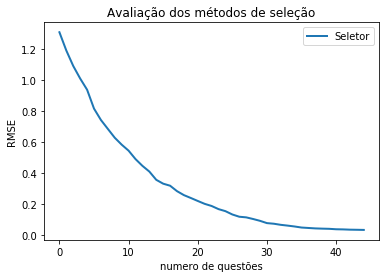

Urry Selector
10000
515.8565282821655


In [89]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = UrrySelector()
base_result = 'Result_dif_erro_UrrySelector-base10000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 755
aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845

aluno: 1459
aluno: 1460
aluno: 1461
aluno: 1462
aluno: 1463
aluno: 1464
aluno: 1465
aluno: 1466
aluno: 1467
aluno: 1468
aluno: 1469
aluno: 1470
aluno: 1471
aluno: 1472
aluno: 1473
aluno: 1474
aluno: 1475
aluno: 1476
aluno: 1477
aluno: 1478
aluno: 1479
aluno: 1480
aluno: 1481
aluno: 1482
aluno: 1483
aluno: 1484
aluno: 1485
aluno: 1486
aluno: 1487
aluno: 1488
aluno: 1489
aluno: 1490
aluno: 1491
aluno: 1492
aluno: 1493
aluno: 1494
aluno: 1495
aluno: 1496
aluno: 1497
aluno: 1498
aluno: 1499
aluno: 1500
aluno: 1501
aluno: 1502
aluno: 1503
aluno: 1504
aluno: 1505
aluno: 1506
aluno: 1507
aluno: 1508
aluno: 1509
aluno: 1510
aluno: 1511
aluno: 1512
aluno: 1513
aluno: 1514
aluno: 1515
aluno: 1516
aluno: 1517
aluno: 1518
aluno: 1519
aluno: 1520
aluno: 1521
aluno: 1522
aluno: 1523
aluno: 1524
aluno: 1525
aluno: 1526
aluno: 1527
aluno: 1528
aluno: 1529
aluno: 1530
aluno: 1531
aluno: 1532
aluno: 1533
aluno: 1534
aluno: 1535
aluno: 1536
aluno: 1537
aluno: 1538
aluno: 1539
aluno: 1540
aluno: 1541
alun

aluno: 2142
aluno: 2143
aluno: 2144
aluno: 2145
aluno: 2146
aluno: 2147
aluno: 2148
aluno: 2149
aluno: 2150
aluno: 2151
aluno: 2152
aluno: 2153
aluno: 2154
aluno: 2155
aluno: 2156
aluno: 2157
aluno: 2158
aluno: 2159
aluno: 2160
aluno: 2161
aluno: 2162
aluno: 2163
aluno: 2164
aluno: 2165
aluno: 2166
aluno: 2167
aluno: 2168
aluno: 2169
aluno: 2170
aluno: 2171
aluno: 2172
aluno: 2173
aluno: 2174
aluno: 2175
aluno: 2176
aluno: 2177
aluno: 2178
aluno: 2179
aluno: 2180
aluno: 2181
aluno: 2182
aluno: 2183
aluno: 2184
aluno: 2185
aluno: 2186
aluno: 2187
aluno: 2188
aluno: 2189
aluno: 2190
aluno: 2191
aluno: 2192
aluno: 2193
aluno: 2194
aluno: 2195
aluno: 2196
aluno: 2197
aluno: 2198
aluno: 2199
aluno: 2200
aluno: 2201
aluno: 2202
aluno: 2203
aluno: 2204
aluno: 2205
aluno: 2206
aluno: 2207
aluno: 2208
aluno: 2209
aluno: 2210
aluno: 2211
aluno: 2212
aluno: 2213
aluno: 2214
aluno: 2215
aluno: 2216
aluno: 2217
aluno: 2218
aluno: 2219
aluno: 2220
aluno: 2221
aluno: 2222
aluno: 2223
aluno: 2224
alun

aluno: 2825
aluno: 2826
aluno: 2827
aluno: 2828
aluno: 2829
aluno: 2830
aluno: 2831
aluno: 2832
aluno: 2833
aluno: 2834
aluno: 2835
aluno: 2836
aluno: 2837
aluno: 2838
aluno: 2839
aluno: 2840
aluno: 2841
aluno: 2842
aluno: 2843
aluno: 2844
aluno: 2845
aluno: 2846
aluno: 2847
aluno: 2848
aluno: 2849
aluno: 2850
aluno: 2851
aluno: 2852
aluno: 2853
aluno: 2854
aluno: 2855
aluno: 2856
aluno: 2857
aluno: 2858
aluno: 2859
aluno: 2860
aluno: 2861
aluno: 2862
aluno: 2863
aluno: 2864
aluno: 2865
aluno: 2866
aluno: 2867
aluno: 2868
aluno: 2869
aluno: 2870
aluno: 2871
aluno: 2872
aluno: 2873
aluno: 2874
aluno: 2875
aluno: 2876
aluno: 2877
aluno: 2878
aluno: 2879
aluno: 2880
aluno: 2881
aluno: 2882
aluno: 2883
aluno: 2884
aluno: 2885
aluno: 2886
aluno: 2887
aluno: 2888
aluno: 2889
aluno: 2890
aluno: 2891
aluno: 2892
aluno: 2893
aluno: 2894
aluno: 2895
aluno: 2896
aluno: 2897
aluno: 2898
aluno: 2899
aluno: 2900
aluno: 2901
aluno: 2902
aluno: 2903
aluno: 2904
aluno: 2905
aluno: 2906
aluno: 2907
alun

aluno: 3509
aluno: 3510
aluno: 3511
aluno: 3512
aluno: 3513
aluno: 3514
aluno: 3515
aluno: 3516
aluno: 3517
aluno: 3518
aluno: 3519
aluno: 3520
aluno: 3521
aluno: 3522
aluno: 3523
aluno: 3524
aluno: 3525
aluno: 3526
aluno: 3527
aluno: 3528
aluno: 3529
aluno: 3530
aluno: 3531
aluno: 3532
aluno: 3533
aluno: 3534
aluno: 3535
aluno: 3536
aluno: 3537
aluno: 3538
aluno: 3539
aluno: 3540
aluno: 3541
aluno: 3542
aluno: 3543
aluno: 3544
aluno: 3545
aluno: 3546
aluno: 3547
aluno: 3548
aluno: 3549
aluno: 3550
aluno: 3551
aluno: 3552
aluno: 3553
aluno: 3554
aluno: 3555
aluno: 3556
aluno: 3557
aluno: 3558
aluno: 3559
aluno: 3560
aluno: 3561
aluno: 3562
aluno: 3563
aluno: 3564
aluno: 3565
aluno: 3566
aluno: 3567
aluno: 3568
aluno: 3569
aluno: 3570
aluno: 3571
aluno: 3572
aluno: 3573
aluno: 3574
aluno: 3575
aluno: 3576
aluno: 3577
aluno: 3578
aluno: 3579
aluno: 3580
aluno: 3581
aluno: 3582
aluno: 3583
aluno: 3584
aluno: 3585
aluno: 3586
aluno: 3587
aluno: 3588
aluno: 3589
aluno: 3590
aluno: 3591
alun

aluno: 4192
aluno: 4193
aluno: 4194
aluno: 4195
aluno: 4196
aluno: 4197
aluno: 4198
aluno: 4199
aluno: 4200
aluno: 4201
aluno: 4202
aluno: 4203
aluno: 4204
aluno: 4205
aluno: 4206
aluno: 4207
aluno: 4208
aluno: 4209
aluno: 4210
aluno: 4211
aluno: 4212
aluno: 4213
aluno: 4214
aluno: 4215
aluno: 4216
aluno: 4217
aluno: 4218
aluno: 4219
aluno: 4220
aluno: 4221
aluno: 4222
aluno: 4223
aluno: 4224
aluno: 4225
aluno: 4226
aluno: 4227
aluno: 4228
aluno: 4229
aluno: 4230
aluno: 4231
aluno: 4232
aluno: 4233
aluno: 4234
aluno: 4235
aluno: 4236
aluno: 4237
aluno: 4238
aluno: 4239
aluno: 4240
aluno: 4241
aluno: 4242
aluno: 4243
aluno: 4244
aluno: 4245
aluno: 4246
aluno: 4247
aluno: 4248
aluno: 4249
aluno: 4250
aluno: 4251
aluno: 4252
aluno: 4253
aluno: 4254
aluno: 4255
aluno: 4256
aluno: 4257
aluno: 4258
aluno: 4259
aluno: 4260
aluno: 4261
aluno: 4262
aluno: 4263
aluno: 4264
aluno: 4265
aluno: 4266
aluno: 4267
aluno: 4268
aluno: 4269
aluno: 4270
aluno: 4271
aluno: 4272
aluno: 4273
aluno: 4274
alun

aluno: 4875
aluno: 4876
aluno: 4877
aluno: 4878
aluno: 4879
aluno: 4880
aluno: 4881
aluno: 4882
aluno: 4883
aluno: 4884
aluno: 4885
aluno: 4886
aluno: 4887
aluno: 4888
aluno: 4889
aluno: 4890
aluno: 4891
aluno: 4892
aluno: 4893
aluno: 4894
aluno: 4895
aluno: 4896
aluno: 4897
aluno: 4898
aluno: 4899
aluno: 4900
aluno: 4901
aluno: 4902
aluno: 4903
aluno: 4904
aluno: 4905
aluno: 4906
aluno: 4907
aluno: 4908
aluno: 4909
aluno: 4910
aluno: 4911
aluno: 4912
aluno: 4913
aluno: 4914
aluno: 4915
aluno: 4916
aluno: 4917
aluno: 4918
aluno: 4919
aluno: 4920
aluno: 4921
aluno: 4922
aluno: 4923
aluno: 4924
aluno: 4925
aluno: 4926
aluno: 4927
aluno: 4928
aluno: 4929
aluno: 4930
aluno: 4931
aluno: 4932
aluno: 4933
aluno: 4934
aluno: 4935
aluno: 4936
aluno: 4937
aluno: 4938
aluno: 4939
aluno: 4940
aluno: 4941
aluno: 4942
aluno: 4943
aluno: 4944
aluno: 4945
aluno: 4946
aluno: 4947
aluno: 4948
aluno: 4949
aluno: 4950
aluno: 4951
aluno: 4952
aluno: 4953
aluno: 4954
aluno: 4955
aluno: 4956
aluno: 4957
alun

aluno: 5559
aluno: 5560
aluno: 5561
aluno: 5562
aluno: 5563
aluno: 5564
aluno: 5565
aluno: 5566
aluno: 5567
aluno: 5568
aluno: 5569
aluno: 5570
aluno: 5571
aluno: 5572
aluno: 5573
aluno: 5574
aluno: 5575
aluno: 5576
aluno: 5577
aluno: 5578
aluno: 5579
aluno: 5580
aluno: 5581
aluno: 5582
aluno: 5583
aluno: 5584
aluno: 5585
aluno: 5586
aluno: 5587
aluno: 5588
aluno: 5589
aluno: 5590
aluno: 5591
aluno: 5592
aluno: 5593
aluno: 5594
aluno: 5595
aluno: 5596
aluno: 5597
aluno: 5598
aluno: 5599
aluno: 5600
aluno: 5601
aluno: 5602
aluno: 5603
aluno: 5604
aluno: 5605
aluno: 5606
aluno: 5607
aluno: 5608
aluno: 5609
aluno: 5610
aluno: 5611
aluno: 5612
aluno: 5613
aluno: 5614
aluno: 5615
aluno: 5616
aluno: 5617
aluno: 5618
aluno: 5619
aluno: 5620
aluno: 5621
aluno: 5622
aluno: 5623
aluno: 5624
aluno: 5625
aluno: 5626
aluno: 5627
aluno: 5628
aluno: 5629
aluno: 5630
aluno: 5631
aluno: 5632
aluno: 5633
aluno: 5634
aluno: 5635
aluno: 5636
aluno: 5637
aluno: 5638
aluno: 5639
aluno: 5640
aluno: 5641
alun

aluno: 6242
aluno: 6243
aluno: 6244
aluno: 6245
aluno: 6246
aluno: 6247
aluno: 6248
aluno: 6249
aluno: 6250
aluno: 6251
aluno: 6252
aluno: 6253
aluno: 6254
aluno: 6255
aluno: 6256
aluno: 6257
aluno: 6258
aluno: 6259
aluno: 6260
aluno: 6261
aluno: 6262
aluno: 6263
aluno: 6264
aluno: 6265
aluno: 6266
aluno: 6267
aluno: 6268
aluno: 6269
aluno: 6270
aluno: 6271
aluno: 6272
aluno: 6273
aluno: 6274
aluno: 6275
aluno: 6276
aluno: 6277
aluno: 6278
aluno: 6279
aluno: 6280
aluno: 6281
aluno: 6282
aluno: 6283
aluno: 6284
aluno: 6285
aluno: 6286
aluno: 6287
aluno: 6288
aluno: 6289
aluno: 6290
aluno: 6291
aluno: 6292
aluno: 6293
aluno: 6294
aluno: 6295
aluno: 6296
aluno: 6297
aluno: 6298
aluno: 6299
aluno: 6300
aluno: 6301
aluno: 6302
aluno: 6303
aluno: 6304
aluno: 6305
aluno: 6306
aluno: 6307
aluno: 6308
aluno: 6309
aluno: 6310
aluno: 6311
aluno: 6312
aluno: 6313
aluno: 6314
aluno: 6315
aluno: 6316
aluno: 6317
aluno: 6318
aluno: 6319
aluno: 6320
aluno: 6321
aluno: 6322
aluno: 6323
aluno: 6324
alun

aluno: 6926
aluno: 6927
aluno: 6928
aluno: 6929
aluno: 6930
aluno: 6931
aluno: 6932
aluno: 6933
aluno: 6934
aluno: 6935
aluno: 6936
aluno: 6937
aluno: 6938
aluno: 6939
aluno: 6940
aluno: 6941
aluno: 6942
aluno: 6943
aluno: 6944
aluno: 6945
aluno: 6946
aluno: 6947
aluno: 6948
aluno: 6949
aluno: 6950
aluno: 6951
aluno: 6952
aluno: 6953
aluno: 6954
aluno: 6955
aluno: 6956
aluno: 6957
aluno: 6958
aluno: 6959
aluno: 6960
aluno: 6961
aluno: 6962
aluno: 6963
aluno: 6964
aluno: 6965
aluno: 6966
aluno: 6967
aluno: 6968
aluno: 6969
aluno: 6970
aluno: 6971
aluno: 6972
aluno: 6973
aluno: 6974
aluno: 6975
aluno: 6976
aluno: 6977
aluno: 6978
aluno: 6979
aluno: 6980
aluno: 6981
aluno: 6982
aluno: 6983
aluno: 6984
aluno: 6985
aluno: 6986
aluno: 6987
aluno: 6988
aluno: 6989
aluno: 6990
aluno: 6991
aluno: 6992
aluno: 6993
aluno: 6994
aluno: 6995
aluno: 6996
aluno: 6997
aluno: 6998
aluno: 6999
aluno: 7000
aluno: 7001
aluno: 7002
aluno: 7003
aluno: 7004
aluno: 7005
aluno: 7006
aluno: 7007
aluno: 7008
alun

aluno: 7609
aluno: 7610
aluno: 7611
aluno: 7612
aluno: 7613
aluno: 7614
aluno: 7615
aluno: 7616
aluno: 7617
aluno: 7618
aluno: 7619
aluno: 7620
aluno: 7621
aluno: 7622
aluno: 7623
aluno: 7624
aluno: 7625
aluno: 7626
aluno: 7627
aluno: 7628
aluno: 7629
aluno: 7630
aluno: 7631
aluno: 7632
aluno: 7633
aluno: 7634
aluno: 7635
aluno: 7636
aluno: 7637
aluno: 7638
aluno: 7639
aluno: 7640
aluno: 7641
aluno: 7642
aluno: 7643
aluno: 7644
aluno: 7645
aluno: 7646
aluno: 7647
aluno: 7648
aluno: 7649
aluno: 7650
aluno: 7651
aluno: 7652
aluno: 7653
aluno: 7654
aluno: 7655
aluno: 7656
aluno: 7657
aluno: 7658
aluno: 7659
aluno: 7660
aluno: 7661
aluno: 7662
aluno: 7663
aluno: 7664
aluno: 7665
aluno: 7666
aluno: 7667
aluno: 7668
aluno: 7669
aluno: 7670
aluno: 7671
aluno: 7672
aluno: 7673
aluno: 7674
aluno: 7675
aluno: 7676
aluno: 7677
aluno: 7678
aluno: 7679
aluno: 7680
aluno: 7681
aluno: 7682
aluno: 7683
aluno: 7684
aluno: 7685
aluno: 7686
aluno: 7687
aluno: 7688
aluno: 7689
aluno: 7690
aluno: 7691
alun

aluno: 8293
aluno: 8294
aluno: 8295
aluno: 8296
aluno: 8297
aluno: 8298
aluno: 8299
aluno: 8300
aluno: 8301
aluno: 8302
aluno: 8303
aluno: 8304
aluno: 8305
aluno: 8306
aluno: 8307
aluno: 8308
aluno: 8309
aluno: 8310
aluno: 8311
aluno: 8312
aluno: 8313
aluno: 8314
aluno: 8315
aluno: 8316
aluno: 8317
aluno: 8318
aluno: 8319
aluno: 8320
aluno: 8321
aluno: 8322
aluno: 8323
aluno: 8324
aluno: 8325
aluno: 8326
aluno: 8327
aluno: 8328
aluno: 8329
aluno: 8330
aluno: 8331
aluno: 8332
aluno: 8333
aluno: 8334
aluno: 8335
aluno: 8336
aluno: 8337
aluno: 8338
aluno: 8339
aluno: 8340
aluno: 8341
aluno: 8342
aluno: 8343
aluno: 8344
aluno: 8345
aluno: 8346
aluno: 8347
aluno: 8348
aluno: 8349
aluno: 8350
aluno: 8351
aluno: 8352
aluno: 8353
aluno: 8354
aluno: 8355
aluno: 8356
aluno: 8357
aluno: 8358
aluno: 8359
aluno: 8360
aluno: 8361
aluno: 8362
aluno: 8363
aluno: 8364
aluno: 8365
aluno: 8366
aluno: 8367
aluno: 8368
aluno: 8369
aluno: 8370
aluno: 8371
aluno: 8372
aluno: 8373
aluno: 8374
aluno: 8375
alun

aluno: 8977
aluno: 8978
aluno: 8979
aluno: 8980
aluno: 8981
aluno: 8982
aluno: 8983
aluno: 8984
aluno: 8985
aluno: 8986
aluno: 8987
aluno: 8988
aluno: 8989
aluno: 8990
aluno: 8991
aluno: 8992
aluno: 8993
aluno: 8994
aluno: 8995
aluno: 8996
aluno: 8997
aluno: 8998
aluno: 8999
aluno: 9000
aluno: 9001
aluno: 9002
aluno: 9003
aluno: 9004
aluno: 9005
aluno: 9006
aluno: 9007
aluno: 9008
aluno: 9009
aluno: 9010
aluno: 9011
aluno: 9012
aluno: 9013
aluno: 9014
aluno: 9015
aluno: 9016
aluno: 9017
aluno: 9018
aluno: 9019
aluno: 9020
aluno: 9021
aluno: 9022
aluno: 9023
aluno: 9024
aluno: 9025
aluno: 9026
aluno: 9027
aluno: 9028
aluno: 9029
aluno: 9030
aluno: 9031
aluno: 9032
aluno: 9033
aluno: 9034
aluno: 9035
aluno: 9036
aluno: 9037
aluno: 9038
aluno: 9039
aluno: 9040
aluno: 9041
aluno: 9042
aluno: 9043
aluno: 9044
aluno: 9045
aluno: 9046
aluno: 9047
aluno: 9048
aluno: 9049
aluno: 9050
aluno: 9051
aluno: 9052
aluno: 9053
aluno: 9054
aluno: 9055
aluno: 9056
aluno: 9057
aluno: 9058
aluno: 9059
alun

aluno: 9660
aluno: 9661
aluno: 9662
aluno: 9663
aluno: 9664
aluno: 9665
aluno: 9666
aluno: 9667
aluno: 9668
aluno: 9669
aluno: 9670
aluno: 9671
aluno: 9672
aluno: 9673
aluno: 9674
aluno: 9675
aluno: 9676
aluno: 9677
aluno: 9678
aluno: 9679
aluno: 9680
aluno: 9681
aluno: 9682
aluno: 9683
aluno: 9684
aluno: 9685
aluno: 9686
aluno: 9687
aluno: 9688
aluno: 9689
aluno: 9690
aluno: 9691
aluno: 9692
aluno: 9693
aluno: 9694
aluno: 9695
aluno: 9696
aluno: 9697
aluno: 9698
aluno: 9699
aluno: 9700
aluno: 9701
aluno: 9702
aluno: 9703
aluno: 9704
aluno: 9705
aluno: 9706
aluno: 9707
aluno: 9708
aluno: 9709
aluno: 9710
aluno: 9711
aluno: 9712
aluno: 9713
aluno: 9714
aluno: 9715
aluno: 9716
aluno: 9717
aluno: 9718
aluno: 9719
aluno: 9720
aluno: 9721
aluno: 9722
aluno: 9723
aluno: 9724
aluno: 9725
aluno: 9726
aluno: 9727
aluno: 9728
aluno: 9729
aluno: 9730
aluno: 9731
aluno: 9732
aluno: 9733
aluno: 9734
aluno: 9735
aluno: 9736
aluno: 9737
aluno: 9738
aluno: 9739
aluno: 9740
aluno: 9741
aluno: 9742
alun

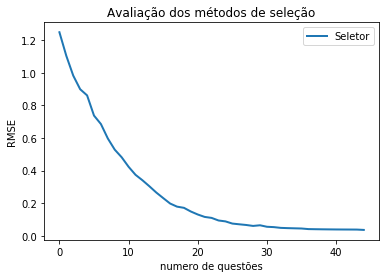

Interval Information Selector
10000
2178.1621832847595


In [90]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(0.1)
base_result = 'Result_dif_erro_IntervalInfoSelector01-base10000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [91]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(0.5)
base_result = 'Result_dif_erro_IntervalInfoSelector05-base10000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

aluno: 0
aluno: 1
aluno: 2
aluno: 3
aluno: 4
aluno: 5
aluno: 6
aluno: 7
aluno: 8
aluno: 9
aluno: 10
aluno: 11
aluno: 12
aluno: 13
aluno: 14
aluno: 15
aluno: 16
aluno: 17
aluno: 18
aluno: 19
aluno: 20
aluno: 21
aluno: 22
aluno: 23
aluno: 24
aluno: 25
aluno: 26
aluno: 27
aluno: 28
aluno: 29
aluno: 30
aluno: 31
aluno: 32
aluno: 33
aluno: 34
aluno: 35
aluno: 36
aluno: 37
aluno: 38
aluno: 39
aluno: 40
aluno: 41
aluno: 42
aluno: 43
aluno: 44
aluno: 45
aluno: 46
aluno: 47
aluno: 48
aluno: 49
aluno: 50
aluno: 51
aluno: 52
aluno: 53
aluno: 54
aluno: 55
aluno: 56
aluno: 57
aluno: 58
aluno: 59
aluno: 60
aluno: 61
aluno: 62
aluno: 63
aluno: 64
aluno: 65
aluno: 66
aluno: 67
aluno: 68
aluno: 69
aluno: 70
aluno: 71
aluno: 72
aluno: 73
aluno: 74
aluno: 75
aluno: 76
aluno: 77
aluno: 78
aluno: 79
aluno: 80
aluno: 81
aluno: 82
aluno: 83
aluno: 84
aluno: 85
aluno: 86
aluno: 87
aluno: 88
aluno: 89
aluno: 90
aluno: 91
aluno: 92
aluno: 93
aluno: 94
aluno: 95
aluno: 96
aluno: 97
aluno: 98
aluno: 99
aluno: 100

aluno: 755
aluno: 756
aluno: 757
aluno: 758
aluno: 759
aluno: 760
aluno: 761
aluno: 762
aluno: 763
aluno: 764
aluno: 765
aluno: 766
aluno: 767
aluno: 768
aluno: 769
aluno: 770
aluno: 771
aluno: 772
aluno: 773
aluno: 774
aluno: 775
aluno: 776
aluno: 777
aluno: 778
aluno: 779
aluno: 780
aluno: 781
aluno: 782
aluno: 783
aluno: 784
aluno: 785
aluno: 786
aluno: 787
aluno: 788
aluno: 789
aluno: 790
aluno: 791
aluno: 792
aluno: 793
aluno: 794
aluno: 795
aluno: 796
aluno: 797
aluno: 798
aluno: 799
aluno: 800
aluno: 801
aluno: 802
aluno: 803
aluno: 804
aluno: 805
aluno: 806
aluno: 807
aluno: 808
aluno: 809
aluno: 810
aluno: 811
aluno: 812
aluno: 813
aluno: 814
aluno: 815
aluno: 816
aluno: 817
aluno: 818
aluno: 819
aluno: 820
aluno: 821
aluno: 822
aluno: 823
aluno: 824
aluno: 825
aluno: 826
aluno: 827
aluno: 828
aluno: 829
aluno: 830
aluno: 831
aluno: 832
aluno: 833
aluno: 834
aluno: 835
aluno: 836
aluno: 837
aluno: 838
aluno: 839
aluno: 840
aluno: 841
aluno: 842
aluno: 843
aluno: 844
aluno: 845

aluno: 1459
aluno: 1460
aluno: 1461
aluno: 1462
aluno: 1463
aluno: 1464
aluno: 1465
aluno: 1466
aluno: 1467
aluno: 1468
aluno: 1469
aluno: 1470
aluno: 1471
aluno: 1472
aluno: 1473
aluno: 1474
aluno: 1475
aluno: 1476
aluno: 1477
aluno: 1478
aluno: 1479
aluno: 1480
aluno: 1481
aluno: 1482
aluno: 1483
aluno: 1484
aluno: 1485
aluno: 1486
aluno: 1487
aluno: 1488
aluno: 1489
aluno: 1490
aluno: 1491
aluno: 1492
aluno: 1493
aluno: 1494
aluno: 1495
aluno: 1496
aluno: 1497
aluno: 1498
aluno: 1499
aluno: 1500
aluno: 1501
aluno: 1502
aluno: 1503
aluno: 1504
aluno: 1505
aluno: 1506
aluno: 1507
aluno: 1508
aluno: 1509
aluno: 1510
aluno: 1511
aluno: 1512
aluno: 1513
aluno: 1514
aluno: 1515
aluno: 1516
aluno: 1517
aluno: 1518
aluno: 1519
aluno: 1520
aluno: 1521
aluno: 1522
aluno: 1523
aluno: 1524
aluno: 1525
aluno: 1526
aluno: 1527
aluno: 1528
aluno: 1529
aluno: 1530
aluno: 1531
aluno: 1532
aluno: 1533
aluno: 1534
aluno: 1535
aluno: 1536
aluno: 1537
aluno: 1538
aluno: 1539
aluno: 1540
aluno: 1541
alun

aluno: 2142
aluno: 2143
aluno: 2144
aluno: 2145
aluno: 2146
aluno: 2147
aluno: 2148
aluno: 2149
aluno: 2150
aluno: 2151
aluno: 2152
aluno: 2153
aluno: 2154
aluno: 2155
aluno: 2156
aluno: 2157
aluno: 2158
aluno: 2159
aluno: 2160
aluno: 2161
aluno: 2162
aluno: 2163
aluno: 2164
aluno: 2165
aluno: 2166
aluno: 2167
aluno: 2168
aluno: 2169
aluno: 2170
aluno: 2171
aluno: 2172
aluno: 2173
aluno: 2174
aluno: 2175
aluno: 2176
aluno: 2177
aluno: 2178
aluno: 2179
aluno: 2180
aluno: 2181
aluno: 2182
aluno: 2183
aluno: 2184
aluno: 2185
aluno: 2186
aluno: 2187
aluno: 2188
aluno: 2189
aluno: 2190
aluno: 2191
aluno: 2192
aluno: 2193
aluno: 2194
aluno: 2195
aluno: 2196
aluno: 2197
aluno: 2198
aluno: 2199
aluno: 2200
aluno: 2201
aluno: 2202
aluno: 2203
aluno: 2204
aluno: 2205
aluno: 2206
aluno: 2207
aluno: 2208
aluno: 2209
aluno: 2210
aluno: 2211
aluno: 2212
aluno: 2213
aluno: 2214
aluno: 2215
aluno: 2216
aluno: 2217
aluno: 2218
aluno: 2219
aluno: 2220
aluno: 2221
aluno: 2222
aluno: 2223
aluno: 2224
alun

aluno: 2826
aluno: 2827
aluno: 2828
aluno: 2829
aluno: 2830
aluno: 2831
aluno: 2832
aluno: 2833
aluno: 2834
aluno: 2835
aluno: 2836
aluno: 2837
aluno: 2838
aluno: 2839
aluno: 2840
aluno: 2841
aluno: 2842
aluno: 2843
aluno: 2844
aluno: 2845
aluno: 2846
aluno: 2847
aluno: 2848
aluno: 2849
aluno: 2850
aluno: 2851
aluno: 2852
aluno: 2853
aluno: 2854
aluno: 2855
aluno: 2856
aluno: 2857
aluno: 2858
aluno: 2859
aluno: 2860
aluno: 2861
aluno: 2862
aluno: 2863
aluno: 2864
aluno: 2865
aluno: 2866
aluno: 2867
aluno: 2868
aluno: 2869
aluno: 2870
aluno: 2871
aluno: 2872
aluno: 2873
aluno: 2874
aluno: 2875
aluno: 2876
aluno: 2877
aluno: 2878
aluno: 2879
aluno: 2880
aluno: 2881
aluno: 2882
aluno: 2883
aluno: 2884
aluno: 2885
aluno: 2886
aluno: 2887
aluno: 2888
aluno: 2889
aluno: 2890
aluno: 2891
aluno: 2892
aluno: 2893
aluno: 2894
aluno: 2895
aluno: 2896
aluno: 2897
aluno: 2898
aluno: 2899
aluno: 2900
aluno: 2901
aluno: 2902
aluno: 2903
aluno: 2904
aluno: 2905
aluno: 2906
aluno: 2907
aluno: 2908
alun

aluno: 3509
aluno: 3510
aluno: 3511
aluno: 3512
aluno: 3513
aluno: 3514
aluno: 3515
aluno: 3516
aluno: 3517
aluno: 3518
aluno: 3519
aluno: 3520
aluno: 3521
aluno: 3522
aluno: 3523
aluno: 3524
aluno: 3525
aluno: 3526
aluno: 3527
aluno: 3528
aluno: 3529
aluno: 3530
aluno: 3531
aluno: 3532
aluno: 3533
aluno: 3534
aluno: 3535
aluno: 3536
aluno: 3537
aluno: 3538
aluno: 3539
aluno: 3540
aluno: 3541
aluno: 3542
aluno: 3543
aluno: 3544
aluno: 3545
aluno: 3546
aluno: 3547
aluno: 3548
aluno: 3549
aluno: 3550
aluno: 3551
aluno: 3552
aluno: 3553
aluno: 3554
aluno: 3555
aluno: 3556
aluno: 3557
aluno: 3558
aluno: 3559
aluno: 3560
aluno: 3561
aluno: 3562
aluno: 3563
aluno: 3564
aluno: 3565
aluno: 3566
aluno: 3567
aluno: 3568
aluno: 3569
aluno: 3570
aluno: 3571
aluno: 3572
aluno: 3573
aluno: 3574
aluno: 3575
aluno: 3576
aluno: 3577
aluno: 3578
aluno: 3579
aluno: 3580
aluno: 3581
aluno: 3582
aluno: 3583
aluno: 3584
aluno: 3585
aluno: 3586
aluno: 3587
aluno: 3588
aluno: 3589
aluno: 3590
aluno: 3591
alun

aluno: 4192
aluno: 4193
aluno: 4194
aluno: 4195
aluno: 4196
aluno: 4197
aluno: 4198
aluno: 4199
aluno: 4200
aluno: 4201
aluno: 4202
aluno: 4203
aluno: 4204
aluno: 4205
aluno: 4206
aluno: 4207
aluno: 4208
aluno: 4209
aluno: 4210
aluno: 4211
aluno: 4212
aluno: 4213
aluno: 4214
aluno: 4215
aluno: 4216
aluno: 4217
aluno: 4218
aluno: 4219
aluno: 4220
aluno: 4221
aluno: 4222
aluno: 4223
aluno: 4224
aluno: 4225
aluno: 4226
aluno: 4227
aluno: 4228
aluno: 4229
aluno: 4230
aluno: 4231
aluno: 4232
aluno: 4233
aluno: 4234
aluno: 4235
aluno: 4236
aluno: 4237
aluno: 4238
aluno: 4239
aluno: 4240
aluno: 4241
aluno: 4242
aluno: 4243
aluno: 4244
aluno: 4245
aluno: 4246
aluno: 4247
aluno: 4248
aluno: 4249
aluno: 4250
aluno: 4251
aluno: 4252
aluno: 4253
aluno: 4254
aluno: 4255
aluno: 4256
aluno: 4257
aluno: 4258
aluno: 4259
aluno: 4260
aluno: 4261
aluno: 4262
aluno: 4263
aluno: 4264
aluno: 4265
aluno: 4266
aluno: 4267
aluno: 4268
aluno: 4269
aluno: 4270
aluno: 4271
aluno: 4272
aluno: 4273
aluno: 4274
alun

aluno: 4875
aluno: 4876
aluno: 4877
aluno: 4878
aluno: 4879
aluno: 4880
aluno: 4881
aluno: 4882
aluno: 4883
aluno: 4884
aluno: 4885
aluno: 4886
aluno: 4887
aluno: 4888
aluno: 4889
aluno: 4890
aluno: 4891
aluno: 4892
aluno: 4893
aluno: 4894
aluno: 4895
aluno: 4896
aluno: 4897
aluno: 4898
aluno: 4899
aluno: 4900
aluno: 4901
aluno: 4902
aluno: 4903
aluno: 4904
aluno: 4905
aluno: 4906
aluno: 4907
aluno: 4908
aluno: 4909
aluno: 4910
aluno: 4911
aluno: 4912
aluno: 4913
aluno: 4914
aluno: 4915
aluno: 4916
aluno: 4917
aluno: 4918
aluno: 4919
aluno: 4920
aluno: 4921
aluno: 4922
aluno: 4923
aluno: 4924
aluno: 4925
aluno: 4926
aluno: 4927
aluno: 4928
aluno: 4929
aluno: 4930
aluno: 4931
aluno: 4932
aluno: 4933
aluno: 4934
aluno: 4935
aluno: 4936
aluno: 4937
aluno: 4938
aluno: 4939
aluno: 4940
aluno: 4941
aluno: 4942
aluno: 4943
aluno: 4944
aluno: 4945
aluno: 4946
aluno: 4947
aluno: 4948
aluno: 4949
aluno: 4950
aluno: 4951
aluno: 4952
aluno: 4953
aluno: 4954
aluno: 4955
aluno: 4956
aluno: 4957
alun

aluno: 5558
aluno: 5559
aluno: 5560
aluno: 5561
aluno: 5562
aluno: 5563
aluno: 5564
aluno: 5565
aluno: 5566
aluno: 5567
aluno: 5568
aluno: 5569
aluno: 5570
aluno: 5571
aluno: 5572
aluno: 5573
aluno: 5574
aluno: 5575
aluno: 5576
aluno: 5577
aluno: 5578
aluno: 5579
aluno: 5580
aluno: 5581
aluno: 5582
aluno: 5583
aluno: 5584
aluno: 5585
aluno: 5586
aluno: 5587
aluno: 5588
aluno: 5589
aluno: 5590
aluno: 5591
aluno: 5592
aluno: 5593
aluno: 5594
aluno: 5595
aluno: 5596
aluno: 5597
aluno: 5598
aluno: 5599
aluno: 5600
aluno: 5601
aluno: 5602
aluno: 5603
aluno: 5604
aluno: 5605
aluno: 5606
aluno: 5607
aluno: 5608
aluno: 5609
aluno: 5610
aluno: 5611
aluno: 5612
aluno: 5613
aluno: 5614
aluno: 5615
aluno: 5616
aluno: 5617
aluno: 5618
aluno: 5619
aluno: 5620
aluno: 5621
aluno: 5622
aluno: 5623
aluno: 5624
aluno: 5625
aluno: 5626
aluno: 5627
aluno: 5628
aluno: 5629
aluno: 5630
aluno: 5631
aluno: 5632
aluno: 5633
aluno: 5634
aluno: 5635
aluno: 5636
aluno: 5637
aluno: 5638
aluno: 5639
aluno: 5640
alun

aluno: 6241
aluno: 6242
aluno: 6243
aluno: 6244
aluno: 6245
aluno: 6246
aluno: 6247
aluno: 6248
aluno: 6249
aluno: 6250
aluno: 6251
aluno: 6252
aluno: 6253
aluno: 6254
aluno: 6255
aluno: 6256
aluno: 6257
aluno: 6258
aluno: 6259
aluno: 6260
aluno: 6261
aluno: 6262
aluno: 6263
aluno: 6264
aluno: 6265
aluno: 6266
aluno: 6267
aluno: 6268
aluno: 6269
aluno: 6270
aluno: 6271
aluno: 6272
aluno: 6273
aluno: 6274
aluno: 6275
aluno: 6276
aluno: 6277
aluno: 6278
aluno: 6279
aluno: 6280
aluno: 6281
aluno: 6282
aluno: 6283
aluno: 6284
aluno: 6285
aluno: 6286
aluno: 6287
aluno: 6288
aluno: 6289
aluno: 6290
aluno: 6291
aluno: 6292
aluno: 6293
aluno: 6294
aluno: 6295
aluno: 6296
aluno: 6297
aluno: 6298
aluno: 6299
aluno: 6300
aluno: 6301
aluno: 6302
aluno: 6303
aluno: 6304
aluno: 6305
aluno: 6306
aluno: 6307
aluno: 6308
aluno: 6309
aluno: 6310
aluno: 6311
aluno: 6312
aluno: 6313
aluno: 6314
aluno: 6315
aluno: 6316
aluno: 6317
aluno: 6318
aluno: 6319
aluno: 6320
aluno: 6321
aluno: 6322
aluno: 6323
alun

aluno: 6924
aluno: 6925
aluno: 6926
aluno: 6927
aluno: 6928
aluno: 6929
aluno: 6930
aluno: 6931
aluno: 6932
aluno: 6933
aluno: 6934
aluno: 6935
aluno: 6936
aluno: 6937
aluno: 6938
aluno: 6939
aluno: 6940
aluno: 6941
aluno: 6942
aluno: 6943
aluno: 6944
aluno: 6945
aluno: 6946
aluno: 6947
aluno: 6948
aluno: 6949
aluno: 6950
aluno: 6951
aluno: 6952
aluno: 6953
aluno: 6954
aluno: 6955
aluno: 6956
aluno: 6957
aluno: 6958
aluno: 6959
aluno: 6960
aluno: 6961
aluno: 6962
aluno: 6963
aluno: 6964
aluno: 6965
aluno: 6966
aluno: 6967
aluno: 6968
aluno: 6969
aluno: 6970
aluno: 6971
aluno: 6972
aluno: 6973
aluno: 6974
aluno: 6975
aluno: 6976
aluno: 6977
aluno: 6978
aluno: 6979
aluno: 6980
aluno: 6981
aluno: 6982
aluno: 6983
aluno: 6984
aluno: 6985
aluno: 6986
aluno: 6987
aluno: 6988
aluno: 6989
aluno: 6990
aluno: 6991
aluno: 6992
aluno: 6993
aluno: 6994
aluno: 6995
aluno: 6996
aluno: 6997
aluno: 6998
aluno: 6999
aluno: 7000
aluno: 7001
aluno: 7002
aluno: 7003
aluno: 7004
aluno: 7005
aluno: 7006
alun

aluno: 7607
aluno: 7608
aluno: 7609
aluno: 7610
aluno: 7611
aluno: 7612
aluno: 7613
aluno: 7614
aluno: 7615
aluno: 7616
aluno: 7617
aluno: 7618
aluno: 7619
aluno: 7620
aluno: 7621
aluno: 7622
aluno: 7623
aluno: 7624
aluno: 7625
aluno: 7626
aluno: 7627
aluno: 7628
aluno: 7629
aluno: 7630
aluno: 7631
aluno: 7632
aluno: 7633
aluno: 7634
aluno: 7635
aluno: 7636
aluno: 7637
aluno: 7638
aluno: 7639
aluno: 7640
aluno: 7641
aluno: 7642
aluno: 7643
aluno: 7644
aluno: 7645
aluno: 7646
aluno: 7647
aluno: 7648
aluno: 7649
aluno: 7650
aluno: 7651
aluno: 7652
aluno: 7653
aluno: 7654
aluno: 7655
aluno: 7656
aluno: 7657
aluno: 7658
aluno: 7659
aluno: 7660
aluno: 7661
aluno: 7662
aluno: 7663
aluno: 7664
aluno: 7665
aluno: 7666
aluno: 7667
aluno: 7668
aluno: 7669
aluno: 7670
aluno: 7671
aluno: 7672
aluno: 7673
aluno: 7674
aluno: 7675
aluno: 7676
aluno: 7677
aluno: 7678
aluno: 7679
aluno: 7680
aluno: 7681
aluno: 7682
aluno: 7683
aluno: 7684
aluno: 7685
aluno: 7686
aluno: 7687
aluno: 7688
aluno: 7689
alun

KeyboardInterrupt: 

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(1)
base_result = 'Result_dif_erro_IntervalInfoSelector1-base10000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file10000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = AStratBBlockSelector(45)
base_result = 'Result_dif_erro_AStratBBlockSelector45-base10000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
a = np.loadtxt('Result_dif_erro_RandomSelector-base10000.txt')
b = np.loadtxt('Result_dif_erro_MaxInfoSelector-base10000.txt')
c = np.loadtxt('Result_dif_erro_UrrySelector-base10000.txt')
d = np.loadtxt('Result_dif_erro_IntervalInfoSelector01-base10000.txt')
e = np.loadtxt('Result_dif_erro_IntervalInfoSelector05-base10000.txt')
f = np.loadtxt('Result_dif_erro_IntervalInfoSelector1-base10000.txt')
g = np.loadtxt('Result_dif_erro_AStratBBlockSelector45-base10000.txt')


# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((a[1:,:])**2,axis=0)), label='Random', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((b[1:,:])**2,axis=0)), label='Max Info', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((c[1:,:])**2,axis=0)), label='Urry', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((d[1:,:])**2,axis=0)), label='Interval Info 0.1', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((e[1:,:])**2,axis=0)), label='Interval Info 0.5', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((f[1:,:])**2,axis=0)), label='Interval Info 1', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((g[1:,:])**2,axis=0)), label='AStratBBlock', linewidth=1)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção - base 10.000")

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

## Base 100.000

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file100000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = RandomSelector()
base_result = 'Result_dif_erro_RandomSelector-base100000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file100000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = MaxInfoSelector()
base_result = 'Result_dif_erro_MaxInfoSelector-base100000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file100000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = UrrySelector()
base_result = 'Result_dif_erro_UrrySelector-base100000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file100000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(0.1)
base_result = 'Result_dif_erro_IntervalInfoSelector01-base100000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file100000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(0.5)
base_result = 'Result_dif_erro_IntervalInfoSelector05-base100000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file100000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = IntervalInfoSelector(1)
base_result = 'Result_dif_erro_IntervalInfoSelector1-base100000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file100000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

selector = AStratBBlockSelector(45)
base_result = 'Result_dif_erro_AStratBBlockSelector45-base100000.txt'

inicio = time.time()
avalia_seletor(selector, base_result, alunos, param, items)
fim = time.time()
print(fim - inicio)

In [ ]:
a = np.loadtxt('Result_dif_erro_RandomSelector-base100000.txt')
b = np.loadtxt('Result_dif_erro_MaxInfoSelector-base100000.txt')
c = np.loadtxt('Result_dif_erro_UrrySelector-base100000.txt')
d = np.loadtxt('Result_dif_erro_IntervalInfoSelector01-base100000.txt')
e = np.loadtxt('Result_dif_erro_IntervalInfoSelector05-base100000.txt')
f = np.loadtxt('Result_dif_erro_IntervalInfoSelector1-base100000.txt')
g = np.loadtxt('Result_dif_erro_AStratBBlockSelector45-base100000.txt')

# define a legenda e tamanho de linhas
plt.plot(range(0, 45), np.sqrt(np.mean((a[1:,:])**2,axis=0)), label='Random', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((b[1:,:])**2,axis=0)), label='Max Info', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((c[1:,:])**2,axis=0)), label='Urry', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((d[1:,:])**2,axis=0)), label='Interval Info 0.1', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((e[1:,:])**2,axis=0)), label='Interval Info 0.5', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((f[1:,:])**2,axis=0)), label='Interval Info 1', linewidth=1)
plt.plot(range(0, 45), np.sqrt(np.mean((g[1:,:])**2,axis=0)), label='AStratBBlock', linewidth=1)

plt.xlabel('numero de questões')
plt.ylabel('RMSE')
plt.title("Avaliação dos métodos de seleção - base 100.000")

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

## Calcula theta original de todos os alunos com 45 questões de matemática

In [129]:
def calculatheta(alunos, param, items):

    aluno_vet = list(range(0, len(alunos.index)))

    responses = []
    administered_items = []
    theta_est = []
    erro_theta = []
    theta_orig = []

    #initializer = RandomInitializer()
    estimator = NumericalSearchEstimator()
    est_theta = initializer.initialize()
    full_items = list(range(0, 45))

    nq = 0
    est_theta=0

    result = np.reshape(list(range(0, 45)),(1,45))

    for aluno in aluno_vet: 
        print('Aluno:', aluno)
        respostas = alunos.iloc[aluno,0:45].tolist()
        ori_theta = estimator.estimate(items=items, administered_items=full_items, response_vector=respostas, est_theta=est_theta)
        print('Theta Original: ',ori_theta)

    theta_orig = np.reshape(ori_theta,(1,99993))
    result = np.concatenate((result, theta_orig), axis=0)

    np.savetxt('Result_theta_original-base100000.txt', result)

In [ ]:
alunos = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/file100000.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/CAT-GYM/Calibração/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

In [ ]:
inicio = time.time()
calculatheta(alunos, param, items)
fim = time.time()
print(fim - inicio)

Aluno: 0
Theta Original:  0.7663519221053628
Aluno: 1
Theta Original:  -1.8969088185664846
Aluno: 2
Theta Original:  0.7011734281062331
Aluno: 3
Theta Original:  -2.8241706515258187
Aluno: 4
Theta Original:  -1.1189923809196167
Aluno: 5
Theta Original:  -0.8753723870712212
Aluno: 6
Theta Original:  -2.158072023778154
Aluno: 7
Theta Original:  -3.2243890070252608
Aluno: 8
Theta Original:  0.4716111488062066
Aluno: 9
Theta Original:  0.4675374536412118
Aluno: 10
Theta Original:  0.3933486874601949
Aluno: 11
Theta Original:  -0.5409496331597409
Aluno: 12
Theta Original:  0.3818460178750486
Aluno: 13
Theta Original:  1.6744539666726186
Aluno: 14
Theta Original:  -0.3505438773118733
Aluno: 15
Theta Original:  -0.32773727893579246
Aluno: 16
Theta Original:  1.4240254182440584
Aluno: 17
Theta Original:  -1.1529391669879532
Aluno: 18
Theta Original:  -2.3837672145956432
Aluno: 19
Theta Original:  0.21553123368606092
Aluno: 20
Theta Original:  -0.4428117751274872
Aluno: 21
Theta Original:  -1.7

Theta Original:  -1.043265296818407
Aluno: 229
Theta Original:  0.058118779340238076
Aluno: 230
Theta Original:  0.9337435709663263
Aluno: 231
Theta Original:  -0.5803699176776599
Aluno: 232
Theta Original:  0.7218732428840757
Aluno: 233
Theta Original:  -0.7886334057588676
Aluno: 234
Theta Original:  0.6876115296963443
Aluno: 235
Theta Original:  1.4302000748062902
Aluno: 236
Theta Original:  2.344561453609315
Aluno: 237
Theta Original:  1.1227435282258815
Aluno: 238
Theta Original:  -1.1140731159205823
Aluno: 239
Theta Original:  -0.5934383393413963
Aluno: 240
Theta Original:  -0.38992197633720516
Aluno: 241
Theta Original:  -2.9723319929734595
Aluno: 242
Theta Original:  -1.1291632536067109
Aluno: 243
Theta Original:  -1.0090085389608756
Aluno: 244
Theta Original:  -0.3470526552791693
Aluno: 245
Theta Original:  -0.5248849554404031
Aluno: 246
Theta Original:  -0.6322869971725521
Aluno: 247
Theta Original:  -0.655932402024504
Aluno: 248
Theta Original:  1.4186616314001455
Aluno: 249


Theta Original:  -0.055721607567573515
Aluno: 440
Theta Original:  0.32825203944702025
Aluno: 441
Theta Original:  0.4400003377400188
Aluno: 442
Theta Original:  0.38947263673457266
Aluno: 443
Theta Original:  0.7120181711134413
Aluno: 444
Theta Original:  -1.729717170823999
Aluno: 445
Theta Original:  -1.739875693386107
Aluno: 446
Theta Original:  2.284258140300632
Aluno: 447
Theta Original:  -0.5579801000430319
Aluno: 448
Theta Original:  -1.7769461074874389
Aluno: 449
Theta Original:  -0.5630978583329093
Aluno: 450
Theta Original:  1.9777275318376393
Aluno: 451
Theta Original:  -0.5148830123407749
Aluno: 452
Theta Original:  -0.7251266494984904
Aluno: 453
Theta Original:  0.3566504195814743
Aluno: 454
Theta Original:  -0.20117914753372917
Aluno: 455
Theta Original:  0.5833115903661017
Aluno: 456
Theta Original:  -2.1395052378169237
Aluno: 457
Theta Original:  -0.30009288288275177
Aluno: 458
Theta Original:  0.33318833357873423
Aluno: 459
Theta Original:  -0.2808722146475298
Aluno: 4

Theta Original:  0.3647414135109488
Aluno: 669
Theta Original:  0.7232945804284227
Aluno: 670
Theta Original:  -0.7050591578212718
Aluno: 671
Theta Original:  0.18999726828864386
Aluno: 672
Theta Original:  -1.3555849526089776
Aluno: 673
Theta Original:  -0.9454124949510773
Aluno: 674
Theta Original:  -0.8376394175
Aluno: 675
Theta Original:  -1.3599084983394982
Aluno: 676
Theta Original:  0.8230507957116912
Aluno: 677
Theta Original:  -0.9265599883645959
Aluno: 678
Theta Original:  0.742023048584234
Aluno: 679
Theta Original:  -2.177337427054881
Aluno: 680
Theta Original:  -0.6297668373774811
Aluno: 681
Theta Original:  0.6966481587089004
Aluno: 682
Theta Original:  -0.5967903635546264
Aluno: 683
Theta Original:  -1.301072251100166
Aluno: 684
Theta Original:  0.9903158858523043
Aluno: 685
Theta Original:  0.921180161919641
Aluno: 686
Theta Original:  -2.0596834088108262
Aluno: 687
Theta Original:  0.10499419116766015
Aluno: 688
Theta Original:  1.0774346956067251
Aluno: 689
Theta Orig

Theta Original:  1.837386730750978
Aluno: 856
Theta Original:  1.4167379771569717
Aluno: 857
Theta Original:  0.61519664820716
Aluno: 858
Theta Original:  -1.2148534955489572
Aluno: 859
Theta Original:  0.23093920358639156
Aluno: 860
Theta Original:  -0.00993213983492298
Aluno: 861
Theta Original:  -0.4753579706715059
Aluno: 862
Theta Original:  -0.5870434180984789
Aluno: 863
Theta Original:  -0.5515842441456948
Aluno: 864
Theta Original:  0.29964692941605586
Aluno: 865
Theta Original:  0.8467739816137415
Aluno: 866
Theta Original:  2.237812669539024
Aluno: 867
Theta Original:  0.5308626480987367
Aluno: 868
Theta Original:  -1.4512987915411437
Aluno: 869
Theta Original:  1.38451696066084
Aluno: 870
Theta Original:  -0.43971849441011934
Aluno: 871
Theta Original:  2.8447849589006657
Aluno: 872
Theta Original:  -0.662513224285353
Aluno: 873
Theta Original:  -0.2953335961731661
Aluno: 874
Theta Original:  -2.1570487741087887
Aluno: 875
Theta Original:  -0.6006325511395764
Aluno: 876
Theta

Theta Original:  -0.3983473063011736
Aluno: 1040
Theta Original:  0.8264838961617105
Aluno: 1041
Theta Original:  0.7685062980062345
Aluno: 1042
Theta Original:  0.24863889225079697
Aluno: 1043
Theta Original:  -1.140880181272951
Aluno: 1044
Theta Original:  0.41051841914240583
Aluno: 1045
Theta Original:  0.9607359843980311
Aluno: 1046
Theta Original:  -0.28814587223083554
Aluno: 1047
Theta Original:  0.051641000130462356
Aluno: 1048
Theta Original:  0.1617929240203739
Aluno: 1049
Theta Original:  0.4688836923976922
Aluno: 1050
Theta Original:  -1.624568538657702
Aluno: 1051
Theta Original:  0.36509641129818327
Aluno: 1052
Theta Original:  -1.2705158761530024
Aluno: 1053
Theta Original:  0.8071388168264335
Aluno: 1054
Theta Original:  -1.2408837233068293
Aluno: 1055
Theta Original:  1.2560041299662192
Aluno: 1056
Theta Original:  -0.5248663881076588
Aluno: 1057
Theta Original:  1.1653980964013406
Aluno: 1058
Theta Original:  0.3384598194910315
Aluno: 1059
Theta Original:  0.0796455466

Theta Original:  -0.5684051371469391
Aluno: 1235
Theta Original:  -0.6458445416873893
Aluno: 1236
Theta Original:  1.1052446986384707
Aluno: 1237
Theta Original:  -0.4730617437449572
Aluno: 1238
Theta Original:  -0.898344914802488
Aluno: 1239
Theta Original:  -1.0204943410790865
Aluno: 1240
Theta Original:  -1.1580980422341771
Aluno: 1241
Theta Original:  -1.458982568659503
Aluno: 1242
Theta Original:  2.476978648867639
Aluno: 1243
Theta Original:  -0.6543672336513948
Aluno: 1244
Theta Original:  0.46745635093166515
Aluno: 1245
Theta Original:  -0.8547783114859502
Aluno: 1246
Theta Original:  2.000167634155918
Aluno: 1247
Theta Original:  1.9927163176939164
Aluno: 1248
Theta Original:  0.46178514612689764
Aluno: 1249
Theta Original:  0.471228098469227
Aluno: 1250
Theta Original:  0.6146179598191808
Aluno: 1251
Theta Original:  1.1168214519613406
Aluno: 1252
Theta Original:  -0.6369657284158757
Aluno: 1253
Theta Original:  -1.4230204037099599
Aluno: 1254
Theta Original:  -3.224386114119

Theta Original:  0.35576784422160584
Aluno: 1420
Theta Original:  0.4667811941986177
Aluno: 1421
Theta Original:  -0.5664949213448425
Aluno: 1422
Theta Original:  -3.2243887231038952
Aluno: 1423
Theta Original:  1.0394870161751162
Aluno: 1424
Theta Original:  0.7797670610950098
Aluno: 1425
Theta Original:  1.2220902197786
Aluno: 1426
Theta Original:  0.8787391345826189
Aluno: 1427
Theta Original:  -0.8626813873589094
Aluno: 1428
Theta Original:  -1.07744366098585
Aluno: 1429
Theta Original:  1.6151387549583958
Aluno: 1430
Theta Original:  1.2751403271122723
Aluno: 1431
Theta Original:  1.3911883453746239
Aluno: 1432
Theta Original:  0.842826639128229
Aluno: 1433
Theta Original:  -1.1315960614383662
Aluno: 1434
Theta Original:  0.6254310459598562
Aluno: 1435
Theta Original:  0.34075924802103663
Aluno: 1436
Theta Original:  -0.09728196512215347
Aluno: 1437
Theta Original:  -0.4932115068327706
Aluno: 1438
Theta Original:  -0.27237625928695947
Aluno: 1439
Theta Original:  -1.27951743591922

Theta Original:  -3.2243873178341267
Aluno: 1606
Theta Original:  0.6345618134501119
Aluno: 1607
Theta Original:  -0.051076043600095836
Aluno: 1608
Theta Original:  0.9003999215255766
Aluno: 1609
Theta Original:  1.0135283089460656
Aluno: 1610
Theta Original:  1.152753689373989
Aluno: 1611
Theta Original:  0.4478350157398355
Aluno: 1612
Theta Original:  -1.3585822018968947
Aluno: 1613
Theta Original:  0.41083311155948665
Aluno: 1614
Theta Original:  -0.8989092692985213
Aluno: 1615
Theta Original:  0.7007212038846823
Aluno: 1616
Theta Original:  2.411255226592669
Aluno: 1617
Theta Original:  1.155646053842053
Aluno: 1618
Theta Original:  -1.6104483912990548
Aluno: 1619
Theta Original:  0.5905097670278627
Aluno: 1620
Theta Original:  0.23029482026115694
Aluno: 1621
Theta Original:  -0.07348774257640871
Aluno: 1622
Theta Original:  0.7264136790480992
Aluno: 1623
Theta Original:  0.8854076380940188
Aluno: 1624
Theta Original:  -0.26258903094032154
Aluno: 1625
Theta Original:  -0.4793937325

Theta Original:  1.3066295500319594
Aluno: 1830
Theta Original:  0.17580220565868446
Aluno: 1831
Theta Original:  -0.9566273278339203
Aluno: 1832
Theta Original:  -1.8723966246148014
Aluno: 1833
Theta Original:  0.7888252474781404
Aluno: 1834
Theta Original:  -1.5500943005547494
Aluno: 1835
Theta Original:  0.7872231799948802
Aluno: 1836
Theta Original:  -1.540827425690772
Aluno: 1837
Theta Original:  1.862678187580057
Aluno: 1838
Theta Original:  0.4297753238369951
Aluno: 1839
Theta Original:  -1.8208813323863688
Aluno: 1840
Theta Original:  0.6180329125480659
Aluno: 1841
Theta Original:  -1.029050513782798
Aluno: 1842
Theta Original:  0.2682589034762222
Aluno: 1843
Theta Original:  -0.029247483248038365
Aluno: 1844
Theta Original:  0.9976318764156796
Aluno: 1845
Theta Original:  0.7754487866699394
Aluno: 1846
Theta Original:  -0.7591090538701507
Aluno: 1847
Theta Original:  0.1960041506360764
Aluno: 1848
Theta Original:  -0.41910925455004683
Aluno: 1849
Theta Original:  -0.8672207316

Theta Original:  1.4044325824924608
Aluno: 2056
Theta Original:  0.7120839567896557
Aluno: 2057
Theta Original:  -1.3817988443512632
Aluno: 2058
Theta Original:  0.6397890916408511
Aluno: 2059
Theta Original:  -2.080833899349123
Aluno: 2060
Theta Original:  0.9499717046383028
Aluno: 2061
Theta Original:  0.16679211437598207
Aluno: 2062
Theta Original:  0.13469233655802182
Aluno: 2063
Theta Original:  1.5593160817771476
Aluno: 2064
Theta Original:  0.820608933772689
Aluno: 2065
Theta Original:  0.4112024637502572
Aluno: 2066
Theta Original:  -3.2243871232229786
Aluno: 2067
Theta Original:  -0.385248617504139
Aluno: 2068
Theta Original:  0.2516721221673209
Aluno: 2069
Theta Original:  -0.11318800360081042
Aluno: 2070
Theta Original:  -0.07951033924622634
Aluno: 2071
Theta Original:  1.7237442882870244
Aluno: 2072
Theta Original:  -3.2243865887744483
Aluno: 2073
Theta Original:  -0.10529721803788575
Aluno: 2074
Theta Original:  -1.047171323263596
Aluno: 2075
Theta Original:  1.44938180299

Theta Original:  0.63873422797893
Aluno: 2290
Theta Original:  -3.224386281235706
Aluno: 2291
Theta Original:  0.08045466636411563
Aluno: 2292
Theta Original:  -0.32617953086975443
Aluno: 2293
Theta Original:  1.1457110606068603
Aluno: 2294
Theta Original:  -0.16111395897841477
Aluno: 2295
Theta Original:  0.5623565950683332
Aluno: 2296
Theta Original:  0.584159301592401
Aluno: 2297
Theta Original:  1.1559178729492319
Aluno: 2298
Theta Original:  1.3048104448529358
Aluno: 2299
Theta Original:  -0.15737826034514713
Aluno: 2300
Theta Original:  1.129362810251417
Aluno: 2301
Theta Original:  0.18023782042294514
Aluno: 2302
Theta Original:  -1.0038767910195494
Aluno: 2303
Theta Original:  0.12646439848796326
Aluno: 2304
Theta Original:  -0.01702635553534947
Aluno: 2305
Theta Original:  -0.787525692812049
Aluno: 2306
Theta Original:  0.12793363866121985
Aluno: 2307
Theta Original:  -1.4209885862012892
Aluno: 2308
Theta Original:  -1.0505651244641079
Aluno: 2309
Theta Original:  -0.612950406

Theta Original:  1.5708462647634482
Aluno: 2525
Theta Original:  0.31720098300546473
Aluno: 2526
Theta Original:  1.2156923299462763
Aluno: 2527
Theta Original:  0.7455905061395394
Aluno: 2528
Theta Original:  2.4703666952884404
Aluno: 2529
Theta Original:  0.6760475642359943
Aluno: 2530
Theta Original:  1.1147692033949002
Aluno: 2531
Theta Original:  0.5244957053767817
Aluno: 2532
Theta Original:  -0.24725003325302253
Aluno: 2533
Theta Original:  1.0198643522073592
Aluno: 2534
Theta Original:  1.2779957826620756
Aluno: 2535
Theta Original:  0.3063159996908282
Aluno: 2536
Theta Original:  1.6432172223867587
Aluno: 2537
Theta Original:  -0.5912615141073505
Aluno: 2538
Theta Original:  0.2732905394508078
Aluno: 2539
Theta Original:  -0.9279895656679802
Aluno: 2540
Theta Original:  1.2701914854303604
Aluno: 2541
Theta Original:  -0.6622912083981075
Aluno: 2542
Theta Original:  -0.665724505947259
Aluno: 2543
Theta Original:  -0.9045018905749244
Aluno: 2544
Theta Original:  -1.1583009201973

Theta Original:  -3.224387347249907
Aluno: 2747
Theta Original:  -2.0531736501361864
Aluno: 2748
Theta Original:  0.4642672213526217
Aluno: 2749
Theta Original:  -3.2243882544675517
Aluno: 2750
Theta Original:  1.8701736931629058
Aluno: 2751
Theta Original:  0.0407360729281464
Aluno: 2752
Theta Original:  -0.45361656019167296
Aluno: 2753
Theta Original:  -0.00602379434647661
Aluno: 2754
Theta Original:  1.1938990416257604
Aluno: 2755
Theta Original:  0.4346163120032705
Aluno: 2756
Theta Original:  1.3809458321795491
Aluno: 2757
Theta Original:  0.9823842366117708
Aluno: 2758
Theta Original:  0.30215813716594464
Aluno: 2759
Theta Original:  0.19281206257605302
Aluno: 2760
Theta Original:  0.37304324953260753
Aluno: 2761
Theta Original:  -0.40590156582859993
Aluno: 2762
Theta Original:  -0.19065896677989072
Aluno: 2763
Theta Original:  -0.35125704588814055
Aluno: 2764
Theta Original:  -0.4298522430319294
Aluno: 2765
Theta Original:  -1.2084582074164287
Aluno: 2766
Theta Original:  0.8289

Theta Original:  -0.3867465394906689
Aluno: 2986
Theta Original:  0.9548110466905546
Aluno: 2987
Theta Original:  1.6066062097744749
Aluno: 2988
Theta Original:  0.8483801266229759
Aluno: 2989
Theta Original:  -0.7236784481913009
Aluno: 2990
Theta Original:  -1.2039356087961566
Aluno: 2991
Theta Original:  -1.8740075528646583
Aluno: 2992
Theta Original:  0.7585976683846847
Aluno: 2993
Theta Original:  -0.8134442611850047
Aluno: 2994
Theta Original:  0.02266845405696281
Aluno: 2995
Theta Original:  1.0289718132352377
Aluno: 2996
Theta Original:  -0.44739453711127103
Aluno: 2997
Theta Original:  -2.0554459535035106
Aluno: 2998
Theta Original:  0.5749073544566984
Aluno: 2999
Theta Original:  -0.8376394175
Aluno: 3000
Theta Original:  -3.2243875747901822
Aluno: 3001
Theta Original:  0.0007647353942278082
Aluno: 3002
Theta Original:  0.02830616157604263
Aluno: 3003
Theta Original:  1.1395328629940211
Aluno: 3004
Theta Original:  -0.4143790630529331
Aluno: 3005
Theta Original:  -0.2942519166

Theta Original:  1.4144254342068598
Aluno: 3198
Theta Original:  0.07952564592878464
Aluno: 3199
Theta Original:  -0.8376394175
Aluno: 3200
Theta Original:  -0.8512500949853051
Aluno: 3201
Theta Original:  1.5566581429531523
Aluno: 3202
Theta Original:  -2.167946165939018
Aluno: 3203
Theta Original:  -0.6297283673686362
Aluno: 3204
Theta Original:  -1.5067302244683274
Aluno: 3205
Theta Original:  0.577087476280009
Aluno: 3206
Theta Original:  0.04456867501214688
Aluno: 3207
Theta Original:  -0.571543894729859
Aluno: 3208
Theta Original:  0.6021265366646207
Aluno: 3209
Theta Original:  -0.8393536771834306
Aluno: 3210
Theta Original:  -1.7215350443906385
Aluno: 3211
Theta Original:  1.308752093187136
Aluno: 3212
Theta Original:  -0.8851051075393206
Aluno: 3213
Theta Original:  -0.5865208724525959
Aluno: 3214
Theta Original:  1.1308969822238675
Aluno: 3215
Theta Original:  -0.3726464196958099
Aluno: 3216
Theta Original:  0.11736386716879244
Aluno: 3217
Theta Original:  -2.169490886954403


Theta Original:  -3.2243864553092605
Aluno: 3421
Theta Original:  0.5736068304048487
Aluno: 3422
Theta Original:  0.6443194507223157
Aluno: 3423
Theta Original:  -0.4899692042770531
Aluno: 3424
Theta Original:  0.4364708813371021
Aluno: 3425
Theta Original:  -3.22438711766041
Aluno: 3426
Theta Original:  -0.2731131648253754
Aluno: 3427
Theta Original:  -0.6434304283537465
Aluno: 3428
Theta Original:  -1.151367881981856
Aluno: 3429
Theta Original:  -2.3164642049101776
Aluno: 3430
Theta Original:  -0.262610130224712
Aluno: 3431
Theta Original:  1.3278254891114063
Aluno: 3432
Theta Original:  -2.235210961714039
Aluno: 3433
Theta Original:  2.3206982835667356
Aluno: 3434
Theta Original:  0.21873186749118975
Aluno: 3435
Theta Original:  0.796187762295776
Aluno: 3436
Theta Original:  -0.3311017775834534
Aluno: 3437
Theta Original:  -0.7402742016129307
Aluno: 3438
Theta Original:  0.04357374020512437
Aluno: 3439
Theta Original:  -0.09300504872159251
Aluno: 3440
Theta Original:  1.043201248514

Theta Original:  -2.1747943617704757
Aluno: 3638
Theta Original:  -1.237141895904467
Aluno: 3639
Theta Original:  1.8291032560851905
Aluno: 3640
Theta Original:  -0.018908659438274085
Aluno: 3641
Theta Original:  -0.7988101142402768
Aluno: 3642
Theta Original:  -0.3833887275542877
Aluno: 3643
Theta Original:  -0.49670420020345796
Aluno: 3644
Theta Original:  0.36742083618343996
Aluno: 3645
Theta Original:  1.4651297569589594
Aluno: 3646
Theta Original:  -0.0733615515359468
Aluno: 3647
Theta Original:  1.6291801081049013
Aluno: 3648
Theta Original:  -0.32594596242715373
Aluno: 3649
Theta Original:  -1.624867555367848
Aluno: 3650
Theta Original:  -0.7144216251513507
Aluno: 3651
Theta Original:  0.377416219720719
Aluno: 3652
Theta Original:  -1.0944874629163186
Aluno: 3653
Theta Original:  -3.224386413016763
Aluno: 3654
Theta Original:  1.024929893791909
Aluno: 3655
Theta Original:  0.3934916692348535
Aluno: 3656
Theta Original:  -0.5478214387506019
Aluno: 3657
Theta Original:  -1.2182492

Theta Original:  1.8601581564255727
Aluno: 3847
Theta Original:  0.27847739042225855
Aluno: 3848
Theta Original:  0.665135215226389
Aluno: 3849
Theta Original:  0.5852073720285552
Aluno: 3850
Theta Original:  1.0515350943470245
Aluno: 3851
Theta Original:  -1.250236343590637
Aluno: 3852
Theta Original:  0.9796631595015435
Aluno: 3853
Theta Original:  -0.7941060548296751
Aluno: 3854
Theta Original:  1.060379171428798
Aluno: 3855
Theta Original:  0.27464299263060316
Aluno: 3856
Theta Original:  2.1063418018971856
Aluno: 3857
Theta Original:  1.3776530708075287
Aluno: 3858
Theta Original:  -1.0060667654358155
Aluno: 3859
Theta Original:  0.18102483040200992
Aluno: 3860
Theta Original:  -0.23077419566896826
Aluno: 3861
Theta Original:  2.201863026946367
Aluno: 3862
Theta Original:  -0.7064058778823653
Aluno: 3863
Theta Original:  1.1760282266625597
Aluno: 3864
Theta Original:  0.09317618937943274
Aluno: 3865
Theta Original:  1.4961798429468929
Aluno: 3866
Theta Original:  -0.28579776921271

Theta Original:  2.083871593539159
Aluno: 4070
Theta Original:  -0.28175439272715064
Aluno: 4071
Theta Original:  -0.29231018988635227
Aluno: 4072
Theta Original:  0.3222952206217421
Aluno: 4073
Theta Original:  -1.2317481700400401
Aluno: 4074
Theta Original:  1.563326175200155
Aluno: 4075
Theta Original:  -1.823169232511195
Aluno: 4076
Theta Original:  0.5081275070025649
Aluno: 4077
Theta Original:  -0.002949838550468402
Aluno: 4078
Theta Original:  -1.5204400622045815
Aluno: 4079
Theta Original:  0.2441231857537882
Aluno: 4080
Theta Original:  -1.2421531992942472
Aluno: 4081
Theta Original:  0.9706002745123625
Aluno: 4082
Theta Original:  0.5869409703798169
Aluno: 4083
Theta Original:  -0.5139483443095266
Aluno: 4084
Theta Original:  -0.555109433342616
Aluno: 4085
Theta Original:  -0.6723629505135503
Aluno: 4086
Theta Original:  -0.7739650125671531
Aluno: 4087
Theta Original:  1.1791407466456112
Aluno: 4088
Theta Original:  1.518868628302872
Aluno: 4089
Theta Original:  2.10609020311

Theta Original:  0.3215875553626067
Aluno: 4259
Theta Original:  1.709391795899055
Aluno: 4260
Theta Original:  0.24596322133107418
Aluno: 4261
Theta Original:  -0.11216860264874284
Aluno: 4262
Theta Original:  0.702591241920211
Aluno: 4263
Theta Original:  -1.133609692391575
Aluno: 4264
Theta Original:  0.33938565229965395
Aluno: 4265
Theta Original:  -2.7375894722878362
Aluno: 4266
Theta Original:  -1.4298132471990936
Aluno: 4267
Theta Original:  -1.3143400404756937
Aluno: 4268
Theta Original:  -0.3655566370312947
Aluno: 4269
Theta Original:  2.2589758113788228
Aluno: 4270
Theta Original:  -0.5247554353568133
Aluno: 4271
Theta Original:  -0.8431028342423519
Aluno: 4272
Theta Original:  -0.6118180102406344
Aluno: 4273
Theta Original:  0.6594245315500119
Aluno: 4274
Theta Original:  -0.8216379202047706
Aluno: 4275
Theta Original:  0.24732024054779464
Aluno: 4276
Theta Original:  0.7466973503582108
Aluno: 4277
Theta Original:  -1.0712386542900005
Aluno: 4278
Theta Original:  0.172110209

Theta Original:  -1.0651391118572398
Aluno: 4484
Theta Original:  0.41749602273677866
Aluno: 4485
Theta Original:  0.7433248516550343
Aluno: 4486
Theta Original:  1.0742676544226093
Aluno: 4487
Theta Original:  2.958447029844375
Aluno: 4488
Theta Original:  0.6702649884123432
Aluno: 4489
Theta Original:  -0.7087382803393522
Aluno: 4490
Theta Original:  -3.224387047168181
Aluno: 4491
Theta Original:  1.5560108979759628
Aluno: 4492
Theta Original:  -0.9263375742244552
Aluno: 4493
Theta Original:  -0.4617132399671125
Aluno: 4494
Theta Original:  -1.1563031770718815
Aluno: 4495
Theta Original:  0.7669727480356144
Aluno: 4496
Theta Original:  0.5393654256608508
Aluno: 4497
Theta Original:  -3.224386390623364
Aluno: 4498
Theta Original:  -2.7268908209591864
Aluno: 4499
Theta Original:  0.24323129448238628
Aluno: 4500
Theta Original:  -0.14202479233588594
Aluno: 4501
Theta Original:  0.89551475700393
Aluno: 4502
Theta Original:  2.337752733951645
Aluno: 4503
Theta Original:  -0.73070657417806

Theta Original:  -0.21656232907899006
Aluno: 4707
Theta Original:  1.2332580584070463
Aluno: 4708
Theta Original:  0.10764542194813005
Aluno: 4709
Theta Original:  0.43169881744742905
Aluno: 4710
Theta Original:  -0.4844155758795475
Aluno: 4711
Theta Original:  -0.048997058418259284
Aluno: 4712
Theta Original:  -1.508992385006944
Aluno: 4713
Theta Original:  -1.270118323513139
Aluno: 4714
Theta Original:  -0.3005851315518607
Aluno: 4715
Theta Original:  1.4069179882897858
Aluno: 4716
Theta Original:  1.1293069160379992
Aluno: 4717
Theta Original:  0.1266114115788966
Aluno: 4718
Theta Original:  0.4588361713455163
Aluno: 4719
Theta Original:  2.616941623783979
Aluno: 4720
Theta Original:  0.086511036094027
Aluno: 4721
Theta Original:  -1.1439970610331929
Aluno: 4722
Theta Original:  -0.8885736261796775
Aluno: 4723
Theta Original:  -1.666696254414281
Aluno: 4724
Theta Original:  -0.2978235209407084
Aluno: 4725
Theta Original:  -0.7134509686468289
Aluno: 4726
Theta Original:  -0.505547217

Theta Original:  -3.224387099024514
Aluno: 4890
Theta Original:  -0.5442128011400631
Aluno: 4891
Theta Original:  -0.3095874789525154
Aluno: 4892
Theta Original:  1.660559946401986
Aluno: 4893
Theta Original:  2.1763193191349774
Aluno: 4894
Theta Original:  -0.1329262739469354
Aluno: 4895
Theta Original:  -0.4810657686606517
Aluno: 4896
Theta Original:  0.35261959703022644
Aluno: 4897
Theta Original:  0.19226003045785695
Aluno: 4898
Theta Original:  -0.5517609959491098
Aluno: 4899
Theta Original:  -0.932019616507892
Aluno: 4900
Theta Original:  -0.7872369319023895
Aluno: 4901
Theta Original:  0.44781438293111353
Aluno: 4902
Theta Original:  2.37686199196955
Aluno: 4903
Theta Original:  -0.563273461935621
Aluno: 4904
Theta Original:  -0.5963546077020038
Aluno: 4905
Theta Original:  0.24843273093756152
Aluno: 4906
Theta Original:  0.005805836752959604
Aluno: 4907
Theta Original:  -0.2917781810179075
Aluno: 4908
Theta Original:  -2.8404626391414194
Aluno: 4909
Theta Original:  -1.48180542